##Assignment
###Combine Data Cleaning, Feature Selection, Modeling and Interpretability
Name - Sanhita Sunil Sawant

NUID - 002786796

MIT License
Copyright (c) 2023 Sanhita Sunil Sawant

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##Abstract
Suicide is a significant public health concern that affects individuals, families, and communities. In this project, we will explore the trends and patterns in suicide rates from 1985 to 2021. Through our analysis, we will gain a better understanding of the factors that contribute to suicide and the populations that are most at risk. By providing an overview of the current state of suicide rates, this project aims to raise awareness and support efforts to prevent suicide.Countries are becoming more and more developed and people have more access to basic goods. There are many other factors deciding why gender plays such a big role. For example, we know that men are more likely to supress their feelings and are on average more violent, leading them to opt for more violent solutions to their problems. With age comes loneliness, the older you are and if you don't have a family, the higher chance that the people you love will be out of your life by then.

##Aim:
In this assignment we aim to create a complete ML project with

* Checking Data Quality
* Feature Selection
* Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
* Model Interpretibility
* Reports and Visualizations


In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=9812a3e0ae02d174be25047c1ed6218228f9a385aab49d123eafa3b48d4a71eb
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

###What question are you trying to answer? How did you frame it as an ML task?

Here I am trying to predict the number of suicides given some of its features like population, suicides_Population, GdpPerCapita, sex. 
The number of suicides is represented by a integer value.


###What is human-level performance on that task? What level of performance is needed?

Performing machine learning models to detect the number of suicides is useful in analyzing and interpreting large data sets related to suicide. ML techniques can identify patterns and relationships in the data, which can help in understanding the factors that contribute to suicide and developing strategies to prevent it. Human experts in suicide prevention and mental health can also analyze such data, but the level of performance needed for the ML model depends on the goals of the analysis. The specific methodology and criteria used to assess performance make it difficult to define human-level performance on this task. Ultimately, the level of performance needed will depend on the specific context and goals of the analysis.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/sanhita54742/Data_Science_002786796/main/master.csv?token=GHSAT0AAAAAAB54OEDCTJHGVJRS4PSIFUHKY6QJNSQ"
)  # Reading CSV file into Pandas DataFrame


##Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [4]:
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.


country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
column_with_null = 'suicides_no'
df = df.dropna(subset=[column_with_null])

In [6]:
pandas_df = df.drop(columns=['country','age','HDI for year','country-year'], axis=1)

In [7]:
pandas_df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.


year                  0
sex                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [8]:

pandas_df.shape  # Shape of the dataframe 

(30556, 8)

In [9]:
pandas_df.head()  # Sample of how our data looks


,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,1987,male,21.0,312900,6.71,"2,15,66,24,900",796.0,Generation X
1,1987,male,16.0,308000,5.19,"2,15,66,24,900",796.0,Silent
2,1987,female,14.0,289700,4.83,"2,15,66,24,900",796.0,Generation X
3,1987,male,1.0,21800,4.59,"2,15,66,24,900",796.0,G.I. Generation
4,1987,male,9.0,274300,3.28,"2,15,66,24,900",796.0,Boomers


In [10]:
data1 = pandas_df.rename(columns = {' gdp_for_year ($) ':'GdpForYearMoney','suicides/100k pop':'suicides_Population','gdp_per_capita ($)':'GdpPerCapita'})

In [11]:
data3 = data1.drop(columns=['GdpForYearMoney'], axis=1)

In [12]:
data3.head()  # Sample of how our data looks


,year,sex,suicides_no,population,suicides_Population,GdpPerCapita,generation
0,1987,male,21.0,312900,6.71,796.0,Generation X
1,1987,male,16.0,308000,5.19,796.0,Silent
2,1987,female,14.0,289700,4.83,796.0,Generation X
3,1987,male,1.0,21800,4.59,796.0,G.I. Generation
4,1987,male,9.0,274300,3.28,796.0,Boomers


In [13]:
data3 = data3.head(500)


In [14]:
data3

,year,sex,suicides_no,population,suicides_Population,GdpPerCapita,generation
0,1987,male,21.0,312900,6.71,796.0,Generation X
1,1987,male,16.0,308000,5.19,796.0,Silent
2,1987,female,14.0,289700,4.83,796.0,Generation X
3,1987,male,1.0,21800,4.59,796.0,G.I. Generation
4,1987,male,9.0,274300,3.28,796.0,Boomers
...,...,...,...,...,...,...,...
495,2006,female,0.0,8571,0.00,14114.0,Millenials
496,2006,female,0.0,4256,0.00,14114.0,Silent
497,2006,female,0.0,1573,0.00,14114.0,Silent
498,2006,male,0.0,7239,0.00,14114.0,Millenials


In [15]:
columns = list(data3.columns)
print(columns)  # Name of all predictors and result

['year', 'sex', 'suicides_no', 'population', 'suicides_Population', 'GdpPerCapita', 'generation']


In [16]:

data3.describe()  # Statistical description of our dataset


,year,suicides_no,population,suicides_Population,GdpPerCapita
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,1997.336000,3.958000,127352.07400,2.160600,5185.376000
std,6.971967,7.148317,139918.84182,3.876505,4037.871297
min,1985.000000,0.000000,424.00000,0.000000,251.000000
25%,1992.000000,0.000000,6483.75000,0.000000,1127.000000
50%,1998.000000,0.000000,31855.50000,0.000000,4359.000000
75%,2003.000000,6.000000,263195.50000,3.342500,8636.000000
max,2010.000000,39.000000,394593.00000,30.000000,14114.000000


In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 500 non-null    int64  
 1   sex                  500 non-null    object 
 2   suicides_no          500 non-null    float64
 3   population           500 non-null    int64  
 4   suicides_Population  500 non-null    float64
 5   GdpPerCapita         500 non-null    float64
 6   generation           500 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 31.2+ KB


In [18]:

#Creating binary vaiables for sex 

data4 = pd.get_dummies(data3)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data4[['suicides_no']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data4[['suicides_no']] = pd.DataFrame(x_scaled)

In [19]:
data_final = data4.drop(columns=['sex_male','generation_G.I. Generation','generation_Generation X','generation_Generation Z','generation_Boomers','generation_Millenials','generation_Silent'], axis=1)

In [20]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 500 non-null    int64  
 1   suicides_no          500 non-null    float64
 2   population           500 non-null    int64  
 3   suicides_Population  500 non-null    float64
 4   GdpPerCapita         500 non-null    float64
 5   sex_female           500 non-null    uint8  
dtypes: float64(3), int64(2), uint8(1)
memory usage: 23.9 KB


In [21]:

 data_final.isnull().sum()

year                   0
suicides_no            0
population             0
suicides_Population    0
GdpPerCapita           0
sex_female             0
dtype: int64

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.60it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
uniform          0.510720  647.775165 -3430.841725     inf      0.064000   
rayleigh         0.525057  678.318063 -3416.998582     inf      0.104755   
norm             0.525327  683.375421 -3416.741708     inf      0.076577   
gamma            0.525415  685.361794 -3410.443598     inf      0.077776   
lognorm          0.525782  685.422399 -3410.094052     inf      0.080229   

          ks_pvalue  
uniform    0.031826  
rayleigh   0.000031  
norm       0.005370  
gamma      0.004456  
lognorm    0.003017  


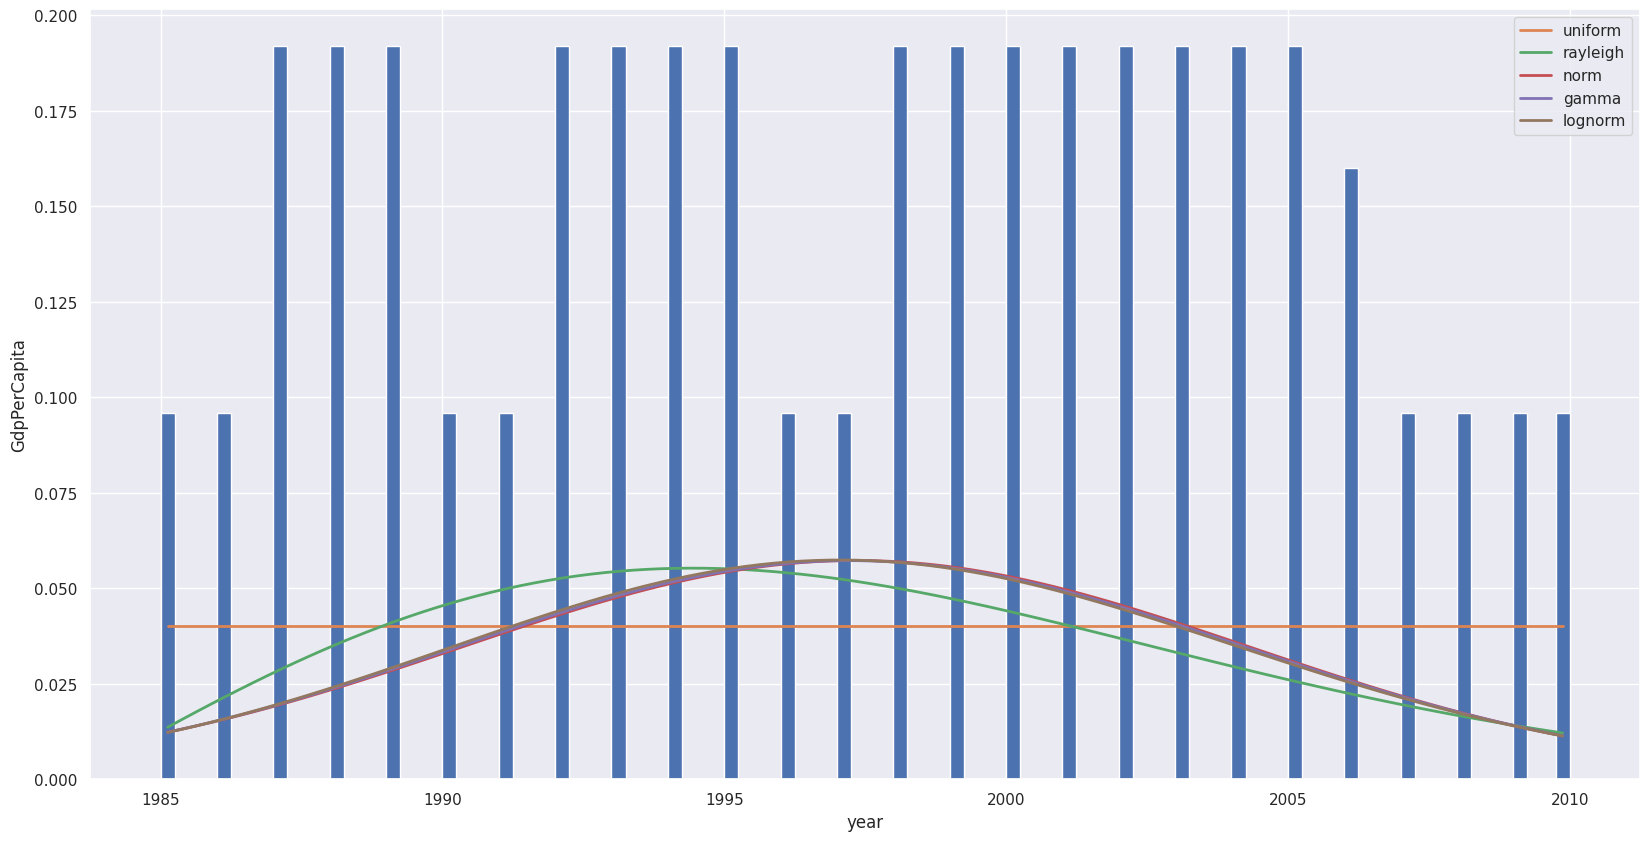

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
gamma         1537.510948  401.834984  580.299835     inf         0.572   
exponpow      2296.701855  133.820708  780.954474     inf         0.572   
chi2          2453.230435  139.463253  813.920265     inf         0.572   
lognorm       2567.855359  477.161091  836.752944     inf         0.572   
expon         2570.845732  531.781575  831.120268     inf         0.572   

              ks_pvalue  
gamma     2.520216e-155  
exponpow  2.520092e-155  
chi2      2.520092e-155  
lognorm   2.521534e-155  
expon     2.520092e-155  


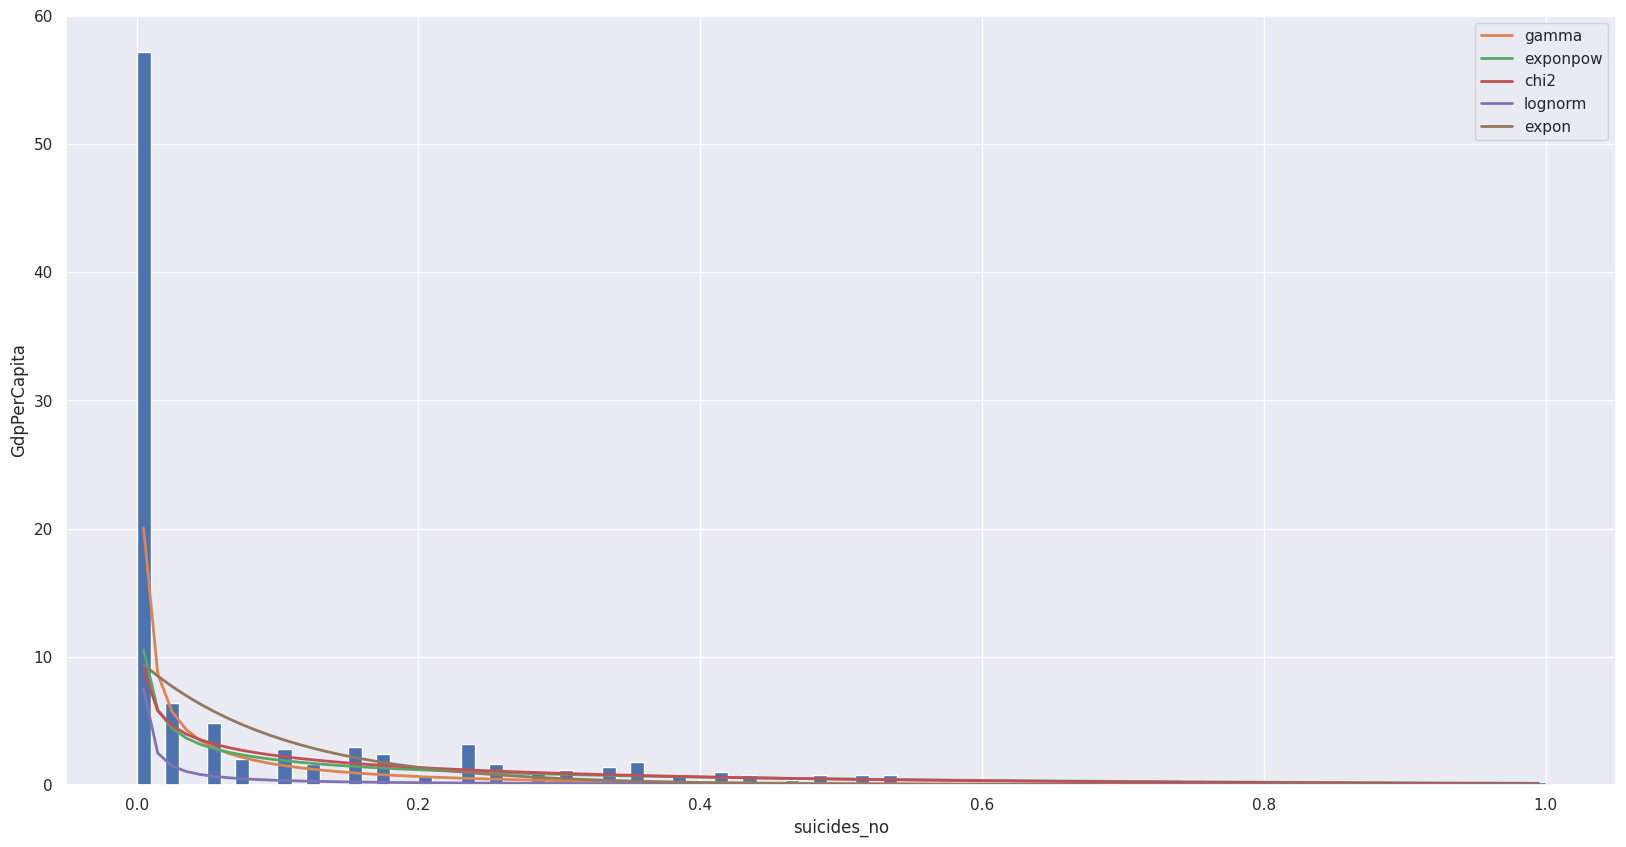

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma        3.157273e-09  2717.673987 -12875.438735     inf      0.212741   
powerlaw     3.267858e-09  2652.422285 -12858.225791     inf      0.209923   
exponpow     3.357348e-09  2698.578924 -12844.717406     inf      0.240847   
cauchy       4.343396e-09  2966.276542 -12722.179503     inf      0.378901   
lognorm      4.395257e-09  3132.211878 -12710.030130     inf      0.666280   

              ks_pvalue  
gamma      2.450551e-20  
powerlaw   8.276405e-20  
exponpow   5.176937e-26  
cauchy     5.102646e-65  
lognorm   4.469635e-219  


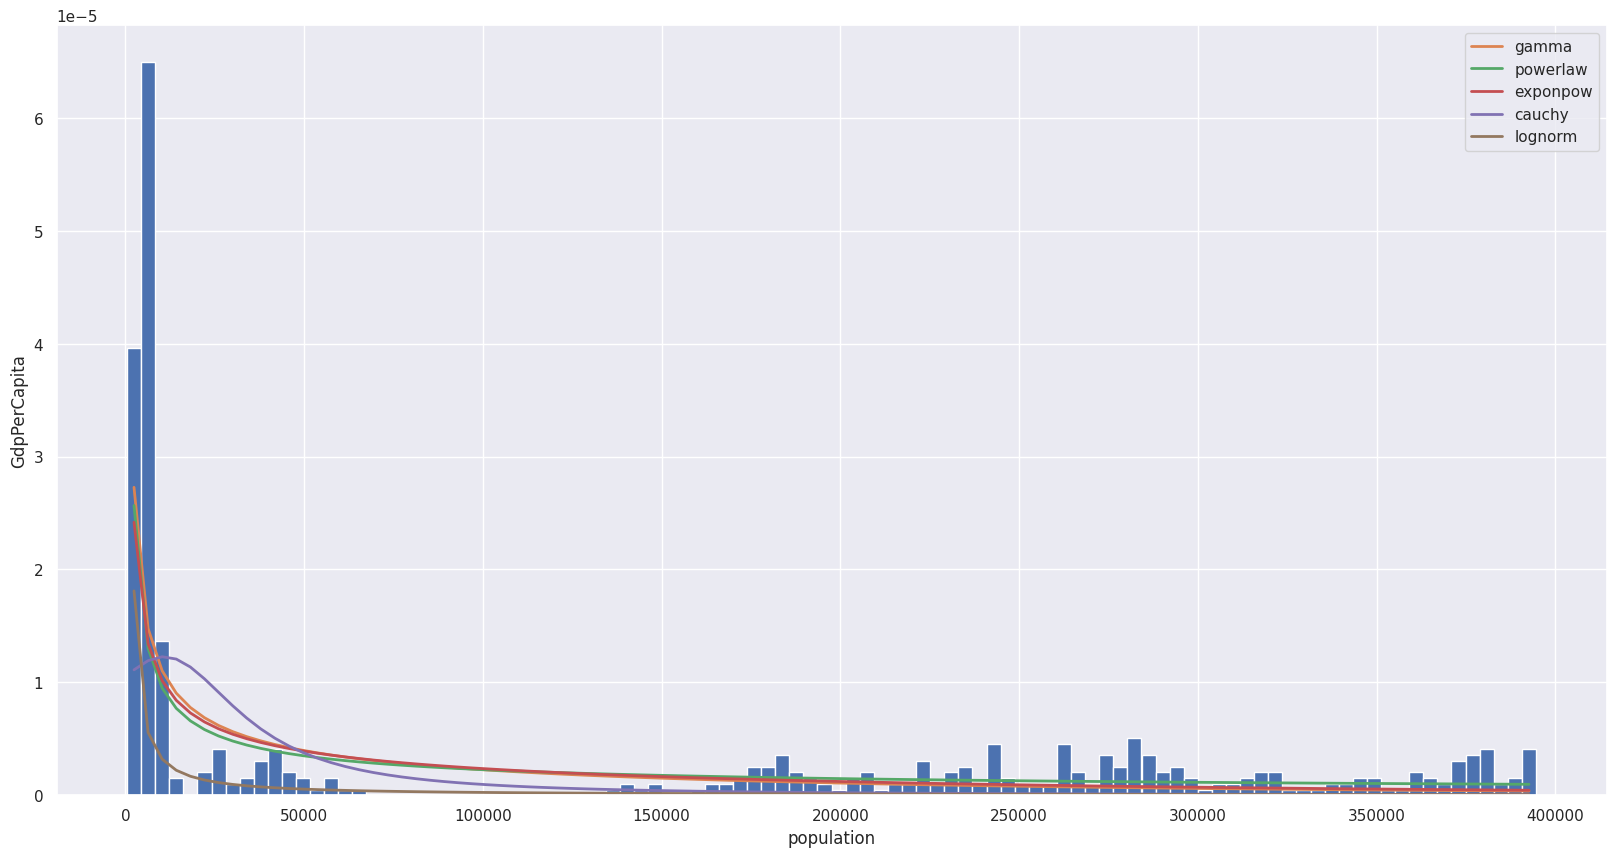

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.56it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
exponpow         2.539924   822.767267 -2622.593210     inf      0.572000   
gamma            2.566230   906.564385 -2617.441188     inf      0.572000   
expon            2.675355  1546.580386 -2602.833798     inf      0.572000   
chi2             2.773527   886.006853 -2578.600396     inf      0.572000   
lognorm          3.381906  1282.945979 -2479.440470     inf      0.544662   

              ks_pvalue  
exponpow  2.520092e-155  
gamma     2.520092e-155  
expon     2.520092e-155  
chi2      2.520092e-155  
lognorm   1.427177e-139  


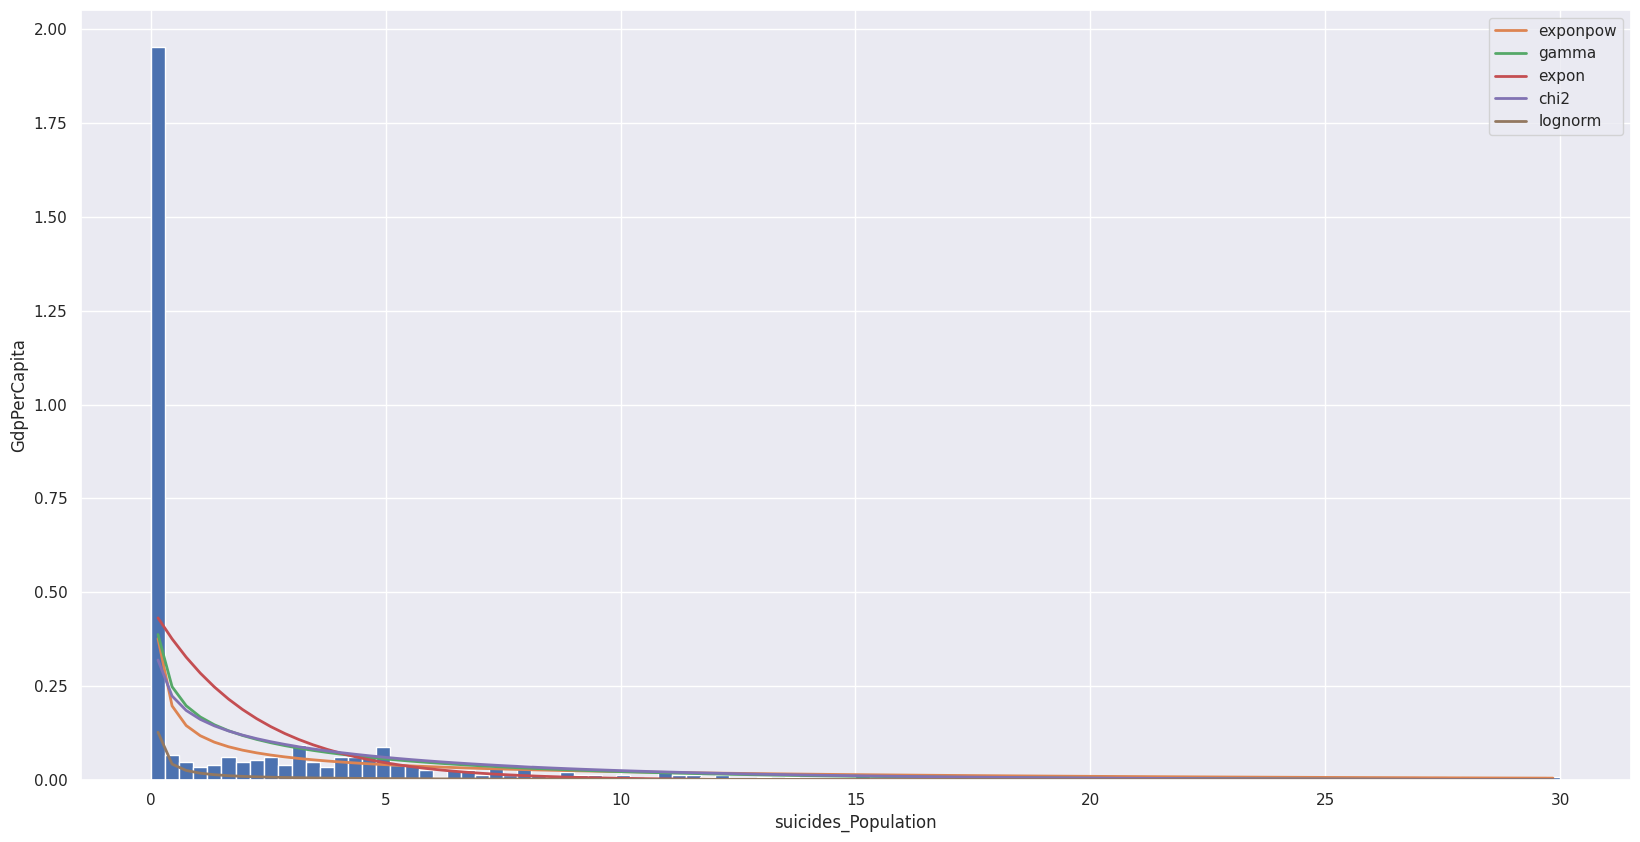

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon            0.000001  1985.743678 -9840.705937     inf      0.141485   
gamma            0.000001  2004.829279 -9833.177962     inf      0.173826   
exponpow         0.000001  1967.893189 -9830.968479     inf      0.132560   
uniform          0.000002  1911.395740 -9779.962295     inf      0.252188   
rayleigh         0.000002  1964.702729 -9770.031383     inf      0.181182   

             ks_pvalue  
expon     3.396036e-09  
gamma     1.107044e-13  
exponpow  4.021150e-08  
uniform   1.638277e-28  
rayleigh  7.799333e-15  


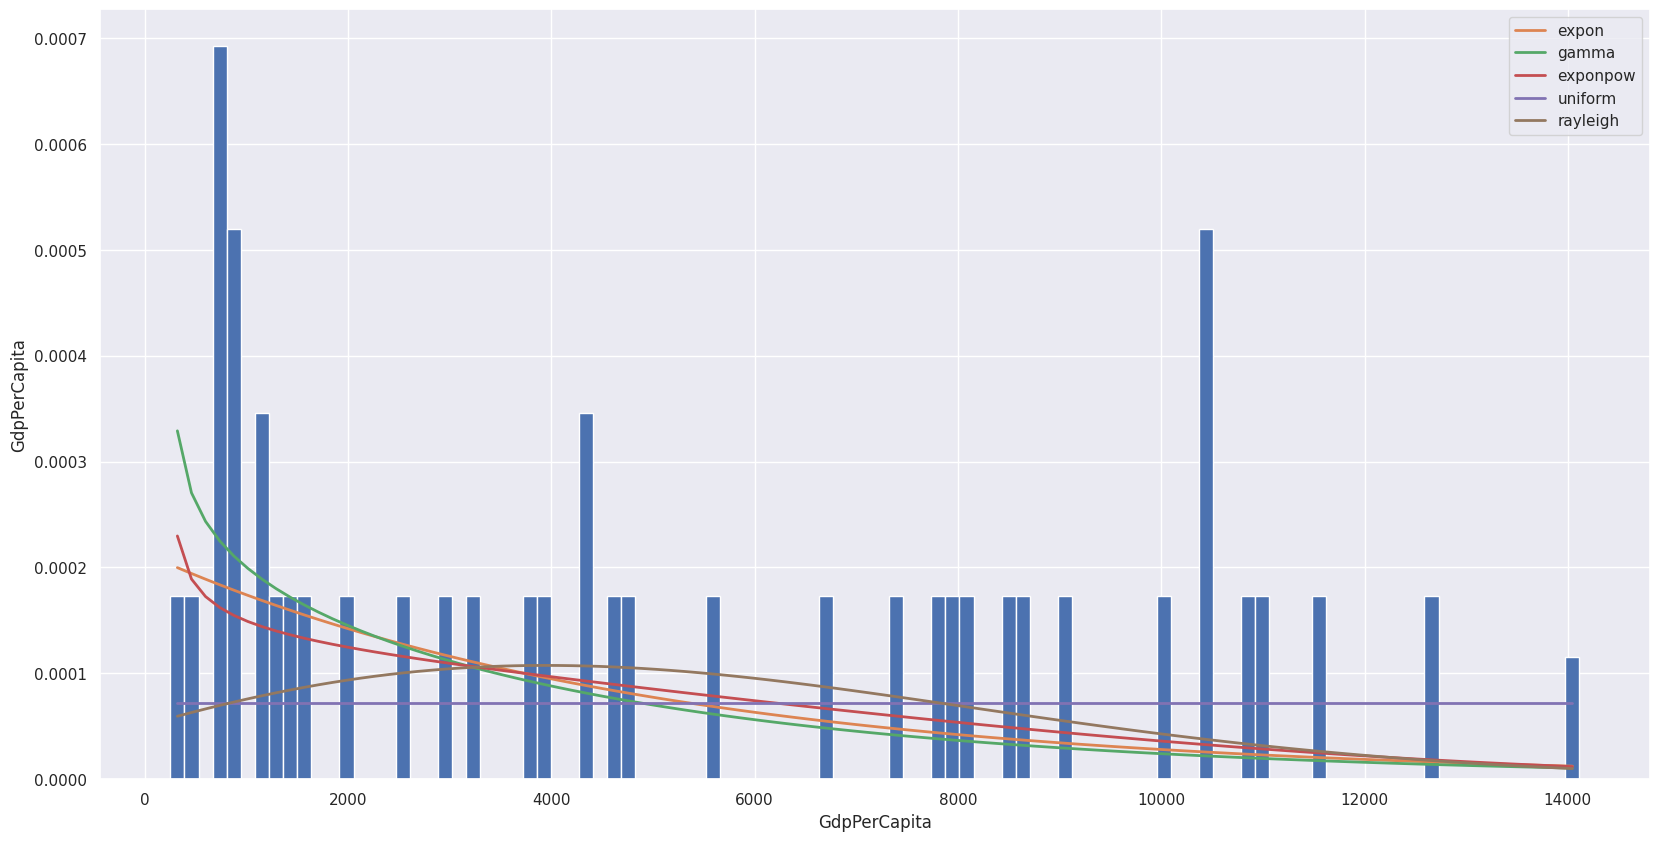

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      4086.720008  377.807549  1069.088762     inf      0.495364   
lognorm       4309.360629  561.187727  1095.612188     inf      0.495850   
chi2          4680.095274  125.495480  1136.876648     inf      0.496000   
expon         4874.987612   65.376896  1151.061588     inf      0.496000   
uniform       4900.320000    4.000000  1153.653061     inf      0.504000   

              ks_pvalue  
exponpow  7.876990e-114  
lognorm   4.556785e-114  
chi2      3.846661e-114  
expon     3.846661e-114  
uniform   4.192611e-118  


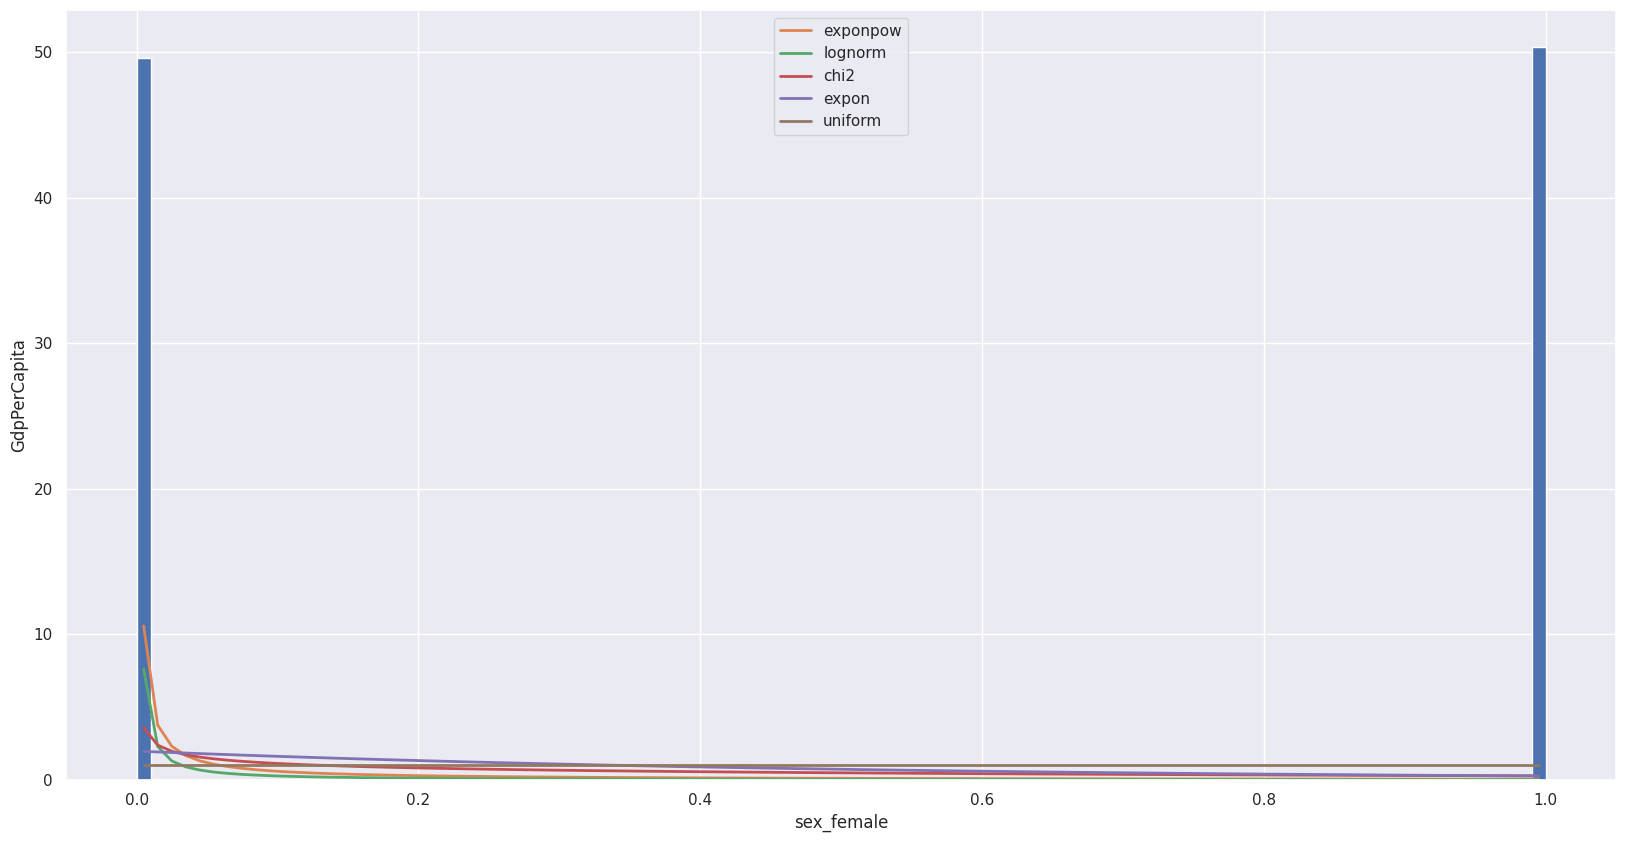

In [22]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in data_final.columns:
    values = data_final[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("GdpPerCapita")
    plt.xlabel(i)
    plt.show()

<Axes: >

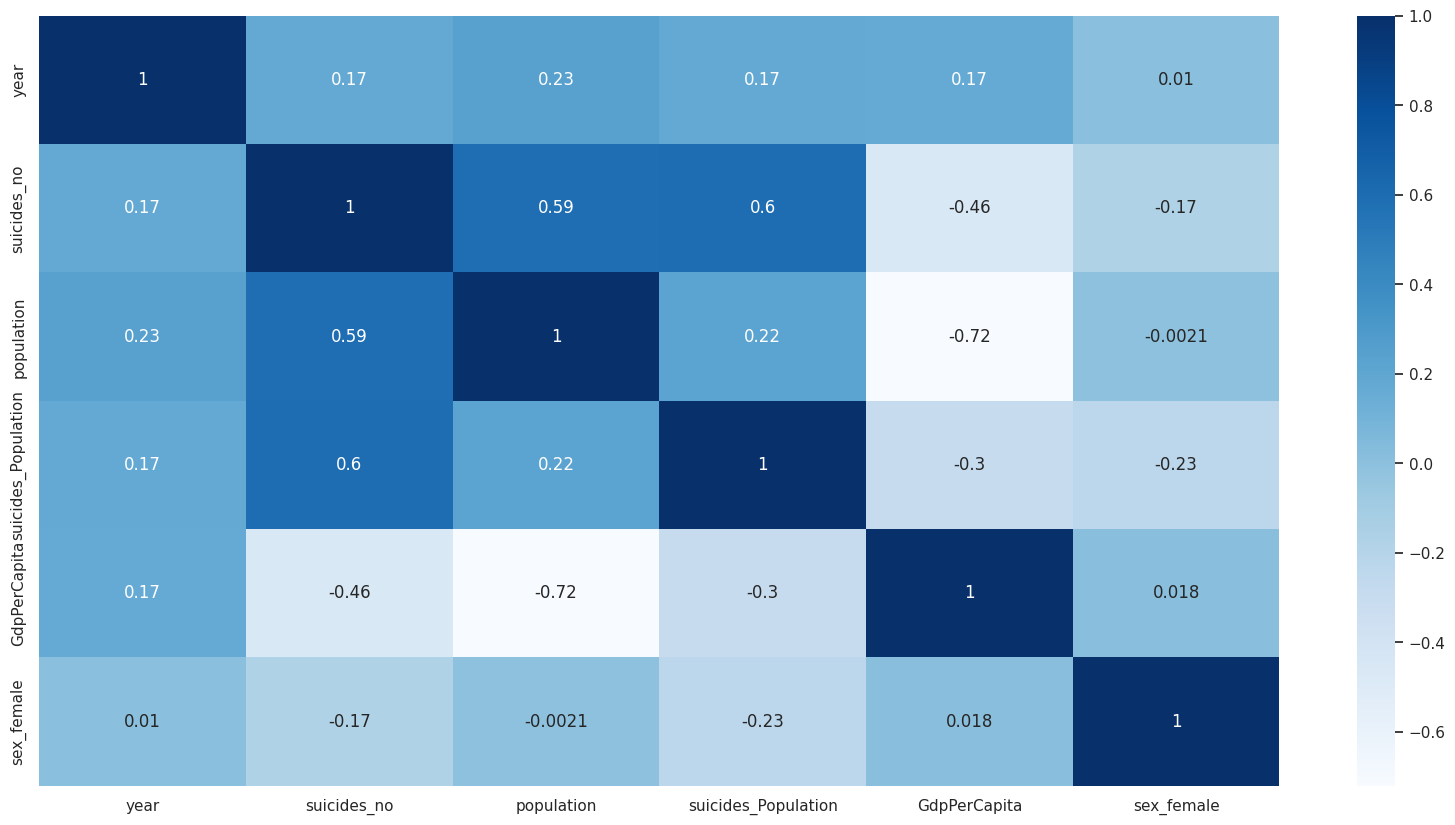

In [23]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    data_final.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

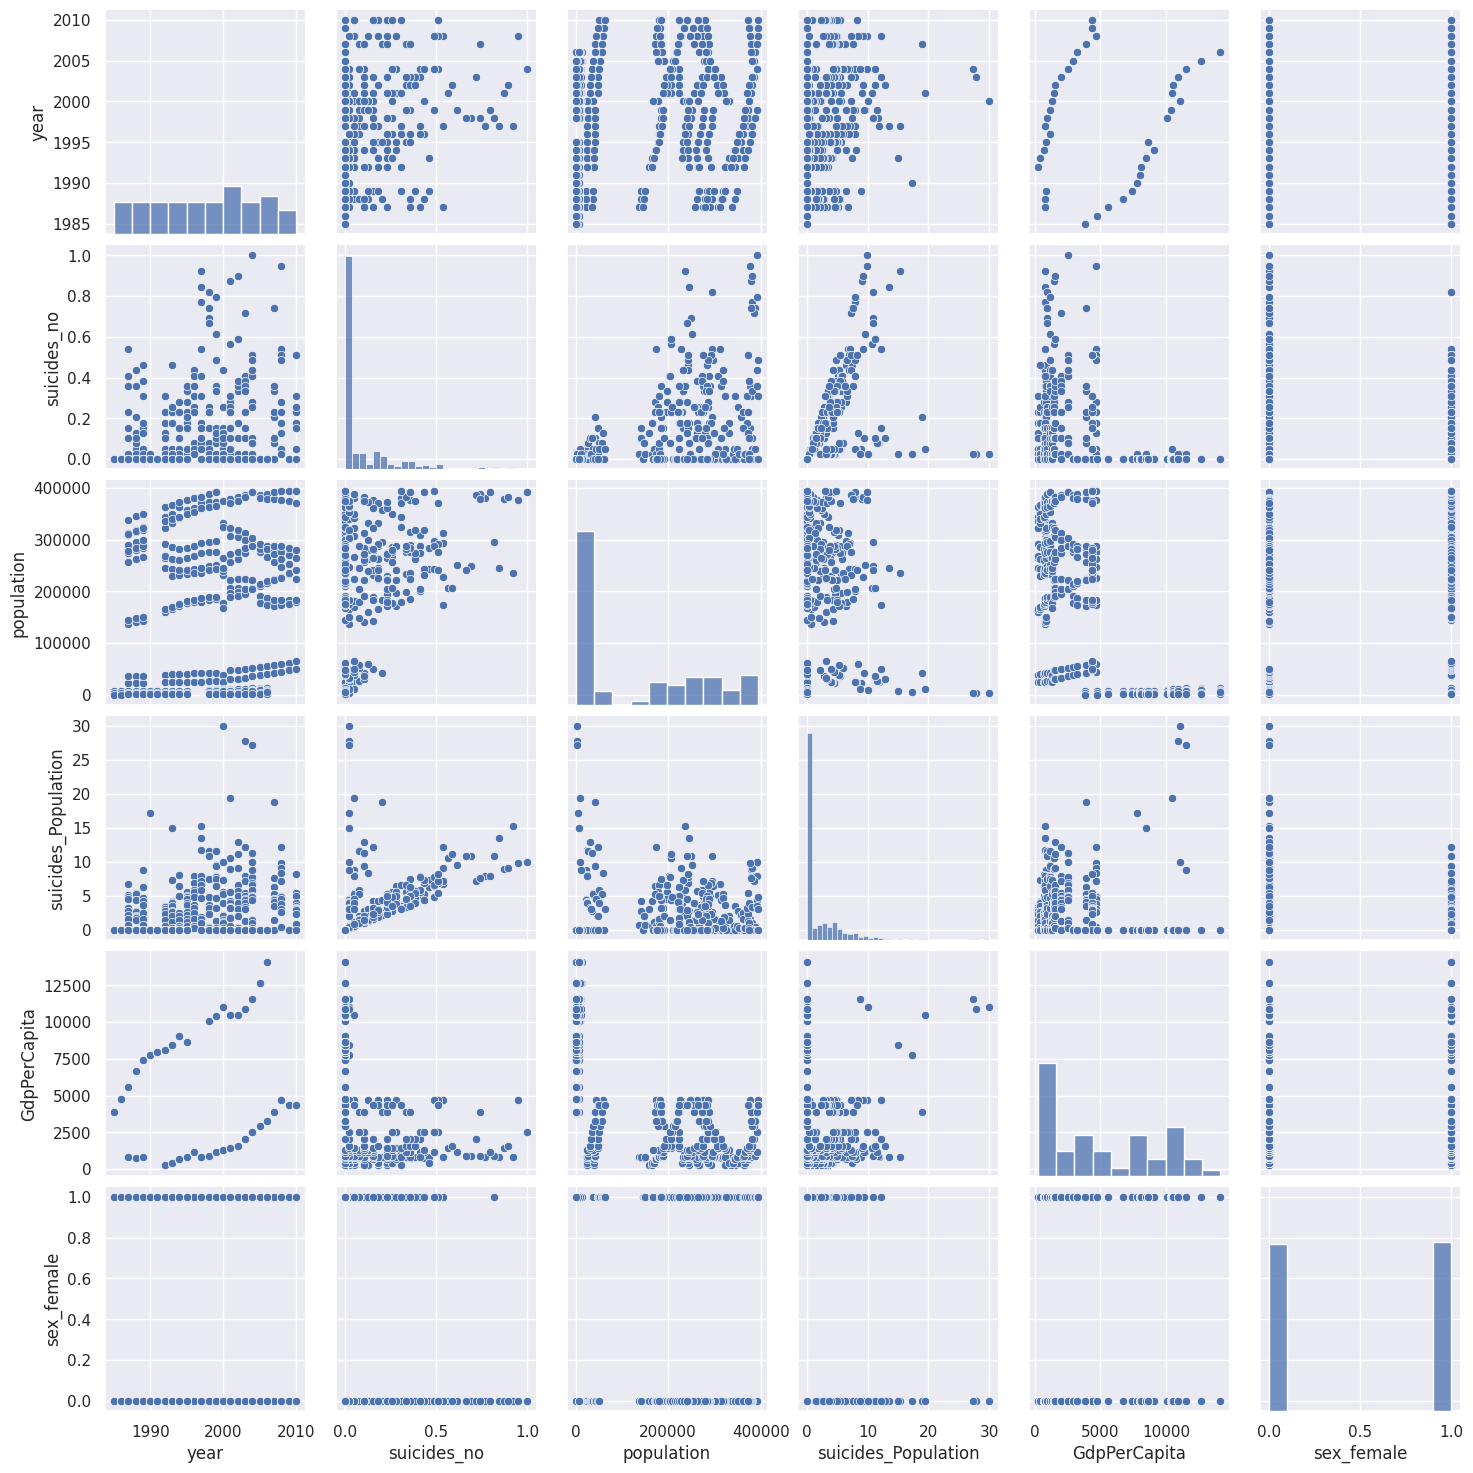

In [24]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(data_final)

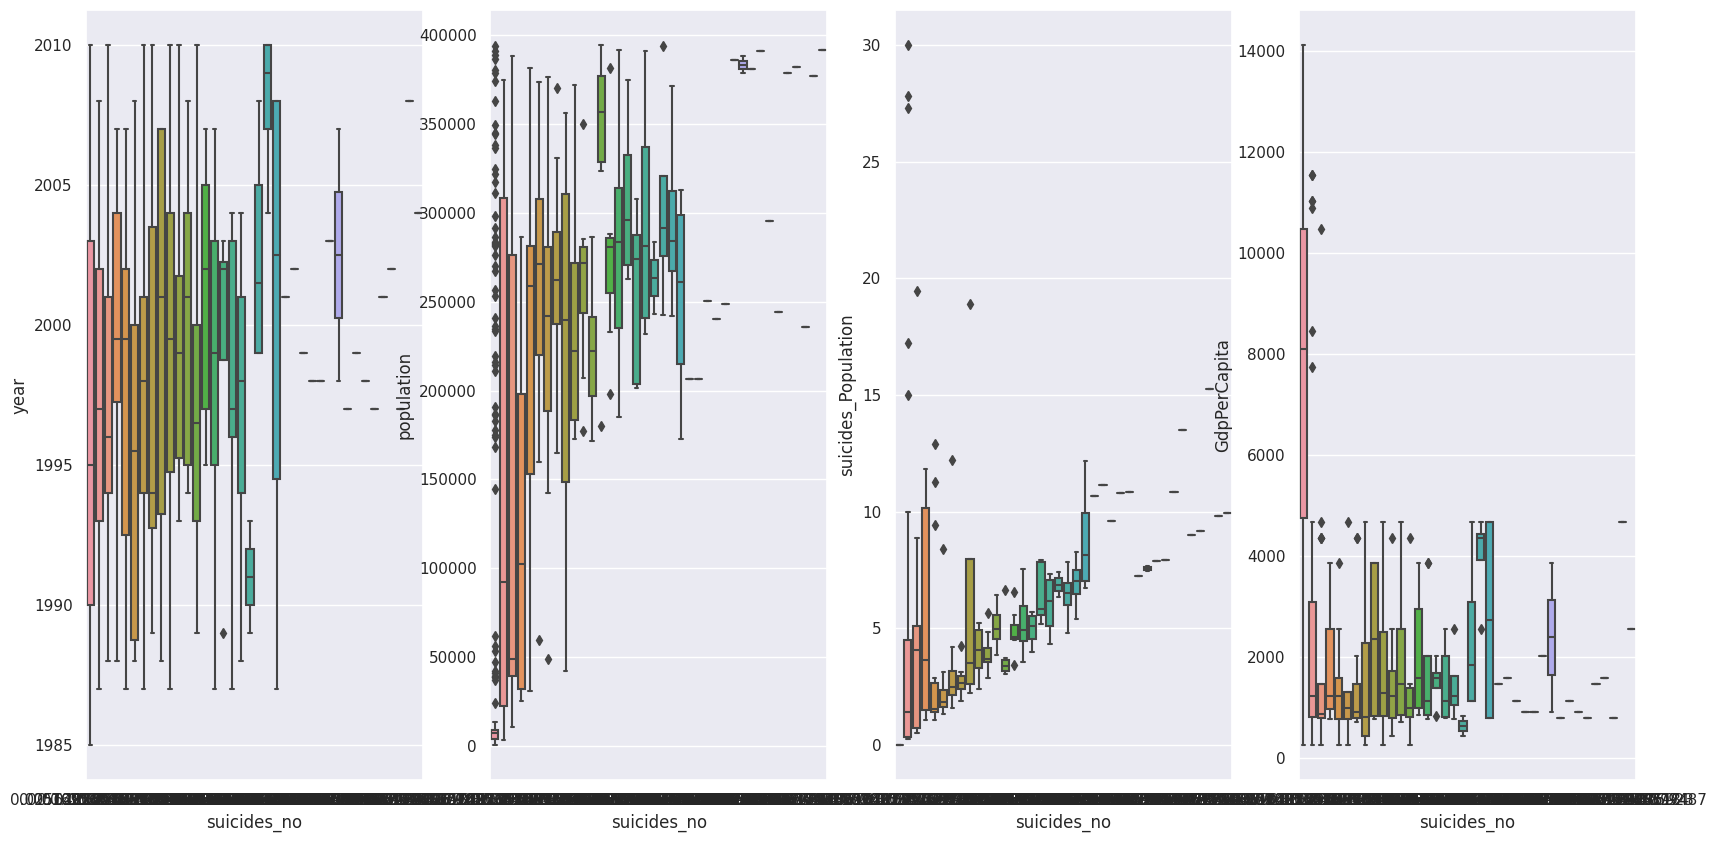

In [25]:
names = data_final[
    [
        "year",
        "population",
        "suicides_Population",
        "GdpPerCapita",
        "suicides_no",
     
    ]
].columns.drop("suicides_no")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="suicides_no",
        data=data_final[
            [
                "year",
        "population",
        "suicides_Population",
        "GdpPerCapita",
        "suicides_no",
      
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

###What kind of data exploration did you do?
Preliminary findings from the EDA.

* Datatype Check - All the features in the dataset are Integers/ Float.
* Missing Data Check - Our Dataset Didn't had any missing values in any of the features.
* Distribution of training data - I checked the probability distribution of each and every feature in the training dataset
* Correlation Check - I performed a correlation check on the dataset using heatmap and pairplot, the findings from it was that the didn't had any significant multi colinearity issues.
* Barplot - Performed Barplot analysis to findout how a variable impacts the number of suicides
The above graphs are a cohesive representation of how number of suicides is changing w.r.t. all the significant variables.

A few findings which we can interpret from the above graph as

number of suicides increase as the suicides_population increase
number of suicides increase as the population increase

These are the preliminary findings about how the individual parameters are affecting the number of suicides.

##Data Cleaning
This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.




##Feature Importance and Selection

Lets fit a very simple linear model to understand how the features of suicides are affecting its number

In [26]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = data_final.drop(["suicides_no"], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, data_final.suicides_no), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [27]:
import statsmodels.formula.api as smf

results = smf.ols(
    "suicides_no ~ population + suicides_Population + GdpPerCapita + sex_female",
    data=df_norm,
).fit()

print(results.summary())

     

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           4.73e-91
Time:                        00:55:23   Log-Likelihood:                 354.48
No. Observations:                 500   AIC:                            -699.0
Df Residuals:                     495   BIC:                            -677.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0388    

##Feature Selection
Feature Selection is the process of selecting the features which are relevant to a machine learning model. It means that you select only those attributes that have a significant effect on the modelâ€™s output.

##Null-Hypothesis
Statistically, this can be achieved by P-Value.

**P-Value** - It stands for â€˜probability valueâ€™; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.

Features in our dataset with P value < 0.05

* population                    
* suicides_Population           
* GdpPerCapita                  
* sex_female                                          




In [28]:
predicted_number_1 = results.predict(
    df_norm[
        [   
        "population",
        "suicides_Population",
        "GdpPerCapita",
        "sex_female",    
        ]
    ]
)
df_norm["predicted_number_1"] = predicted_number_1.round()

In [29]:
def percentage_change(l1, l2):
    percent_change = np.abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = np.mean(percent_change)
    return avg_change

In [30]:
print(
    "Accuracy of predicting the correct number of suicides using all features = ",
    100 - percentage_change(df_norm["suicides_no"], df_norm["predicted_number_1"]),
)

Accuracy of predicting the correct number of suicides using all features =  99.3500000136472


###How did you split the data into train, and test?

The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [31]:
df_norm = df_norm.drop(["predicted_number_1"], axis=1)


In [32]:
X = df_norm.drop(["suicides_no"], axis=1)  # Training Feature
Y = df_norm["suicides_no"]  # Target

In [33]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

##Fitting a Linear Model

In [34]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [35]:
y_linear_predictions = linear_model.predict(x_test).round()

##Fitting a Tree Based Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [37]:
y_tree_based_predictions = tree_model.predict(x_test).round()


##Fitting a Support Vector Machine (SVM)

In [38]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [39]:
svm_predictions = svm_model.predict(x_test).round()


##Fitting a MLP Regressor

In [40]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [41]:
mlp_predictions = regr.predict(x_test).round()


##Using AutoML to find out the best Model

In [42]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [43]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [44]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:22194..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw8puzdvf
  JVM stdout: /tmp/tmpw8puzdvf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw8puzdvf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:22194
Connecting to H2O server at http://127.0.0.1:22194 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_lo6bvn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [45]:
data_final_hf = h2o.H2OFrame(data_final)  # Converting Pandas dataframe in H2O dataframe


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = data_final_hf.split_frame([pct_rows])

In [47]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "suicides_no"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [48]:
autoML = autoML(df_train, df_test)  # Training AutoML


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [49]:
autoML[2].leaderboard  # Leaderbord of AutoML output


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230409_05536,0.0240557,0.000578678,0.010717,0.0161804,0.000578678
GBM_grid_1_AutoML_1_20230409_05536_model_58,0.0255991,0.000655316,0.0105482,0.0166471,0.000655316
GBM_grid_1_AutoML_1_20230409_05536_model_2,0.0269827,0.000728063,0.0112559,0.0180018,0.000728063
GBM_grid_1_AutoML_1_20230409_05536_model_12,0.027421,0.000751912,0.0114457,0.0181294,0.000751912
GBM_grid_1_AutoML_1_20230409_05536_model_47,0.0276895,0.00076671,0.0113386,0.0186036,0.00076671
GBM_grid_1_AutoML_1_20230409_05536_model_42,0.0285121,0.000812941,0.0123816,0.020042,0.000812941
XGBoost_grid_1_AutoML_1_20230409_05536_model_33,0.0285911,0.00081745,0.0122291,0.0195684,0.00081745
XGBoost_grid_1_AutoML_1_20230409_05536_model_78,0.0287921,0.000828986,0.0125169,0.020378,0.000828986
XGBoost_grid_1_AutoML_1_20230409_05536_model_55,0.0301776,0.000910686,0.0135536,0.0211415,0.000910686
XGBoost_grid_1_AutoML_1_20230409_05536_model_29,0.0305768,0.000934943,0.0131791,0.0209317,0.000934943


In [50]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model


6


In [51]:
autoML_best_predictions = autoML_model.predict(df_test).round()


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [52]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["suicides_no"], use_pandas=False)

In [53]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [54]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)


##Hyperparameter Tuning of AutoML's Best Model

In [55]:
train, validate, test = np.split(
    data_final.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

xgboost_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=xgboost_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="suicides_no",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)

def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_xgboost_model = find_best_model_from_grid(gbm_grid2, "r2")

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_11
Best R2: 0.83627616793478


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


###What evaluation metric are you using?
The evaluation metrics which I am using are

* Mean Squared Error
* Root Mean Squared Error
* Mean Absolute Error
* Mean Residual Deviance

These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

How do training, validation, and test metrics compare?
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~2.8628 and ~1.228 respectively. Also, the other metrics on both of the dataset validates that the model is not overfitting the Training Data. Please refer below to see the Evaluation Metrics on both training and validation dataset.

In [56]:
best_xgboost_model

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,100.0,100.0,110842.0,9.0,14.0,12.07,57.0,104.0,83.59
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-04-09 00:59:28,5.267 sec,0.0,nan,nan,nan,nan,nan,nan
,2023-04-09 00:59:28,5.271 sec,1.0,0.1425036,0.0601119,0.0203073,0.1479100,0.0750598,0.0218774
,2023-04-09 00:59:28,5.274 sec,2.0,0.1466642,0.0695873,0.0215104,0.1115972,0.0568718,0.0124539
,2023-04-09 00:59:28,5.277 sec,3.0,0.1220632,0.0513150,0.0148994,0.0734986,0.0387530,0.0054020
,2023-04-09 00:59:28,5.282 sec,4.0,0.1089043,0.0459684,0.0118602,0.0710618,0.0374194,0.0050498
,2023-04-09 00:59:28,5.293 sec,5.0,0.1076975,0.0459139,0.0115987,0.0728035,0.0352786,0.0053004
,2023-04-09 00:59:28,5.297 sec,6.0,0.1042311,0.0460330,0.0108641,0.0654744,0.0331143,0.0042869
,2023-04-09 00:59:28,5.300 sec,7.0,0.1107992,0.0496249,0.0122765,0.0633584,0.0328501,0.0040143


In [57]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_xgboost_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["suicides_no"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


###Which models did you explore and did you try to tune the hyperparameters of the best model you got?
I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were

* Linear Regressor
* Random Forest Regressor
* MLP Regressor
* Support Vector Machine(SVM) Regressor
* AutoML
The models which gave me the best performance in predicting the number of suicides were the MLP and the Linear Regressor



In [58]:
print(
    "Accuracy of predicting the correct number of suicides using MLP Regressor = ",
    100 - percentage_change(y_test, mlp_predictions),
)
print(
    "Accuracy of predicting the correct number of suicides using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of predicting the correct number of suicides using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of predicting the correct number of suicides using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting the correct number of suicides using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting the correct number of suicides using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Accuracy of predicting the correct number of suicides using MLP Regressor =  99.66000000461058
Accuracy of predicting the correct number of suicides using Linear Model =  99.66000000461058
Accuracy of predicting the correct number of suicides using Tree Based Model =  99.6589473730338
Accuracy of predicting the correct number of suicides using SVM =  99.6589473730338
Accuracy of predicting the correct number of suicides using best AutoML model =  99.59786619538652
Accuracy of predicting the correct number of suicides using best AutoML model with Tuned Hyper-Parameters =  99.59681893437894


##Model Selection

Model Selection From the above summary of the models trained on the dataset, the two best models are MLP and Linear Model.

* MLP Regressor with an Accuracy of ~ 99.66%
* AutoML's Hyperparameter Tuned Version ~ 99.66%
Let's try to understand how both the models have been trained.

Interpreting MLP Regressor using SHAP values

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of population

The cross is made at approx E[f(x)] 0.17
So as the fixed_acidity increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [59]:
MLP_explainer = shap.Explainer(regr.predict, x_train_100)
MLP_shap_values = MLP_explainer(x_train_100)

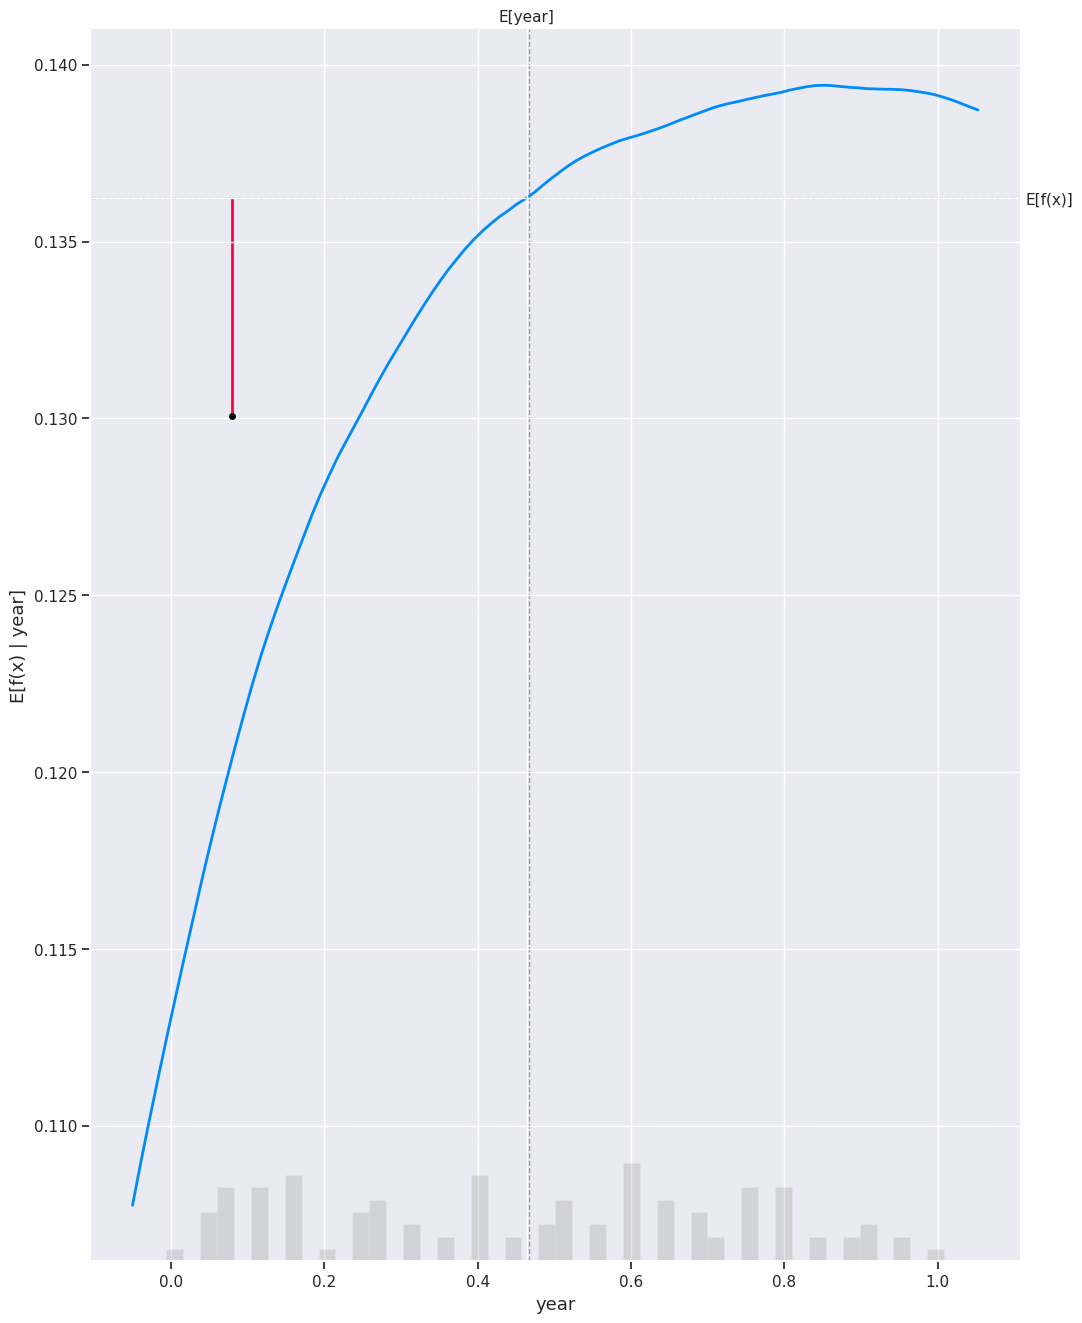

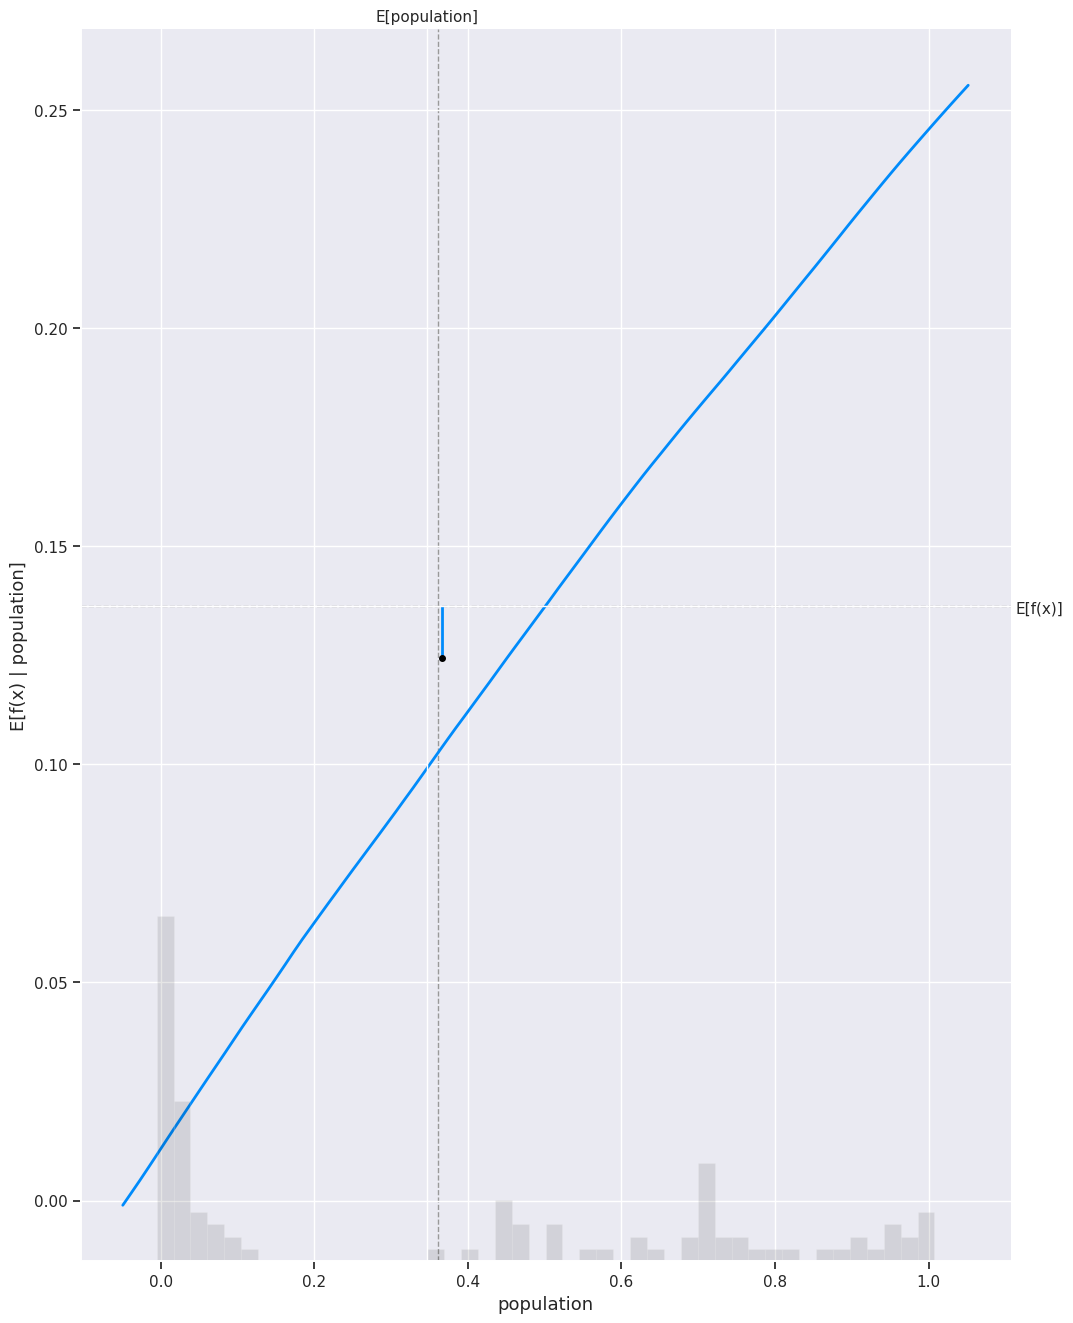

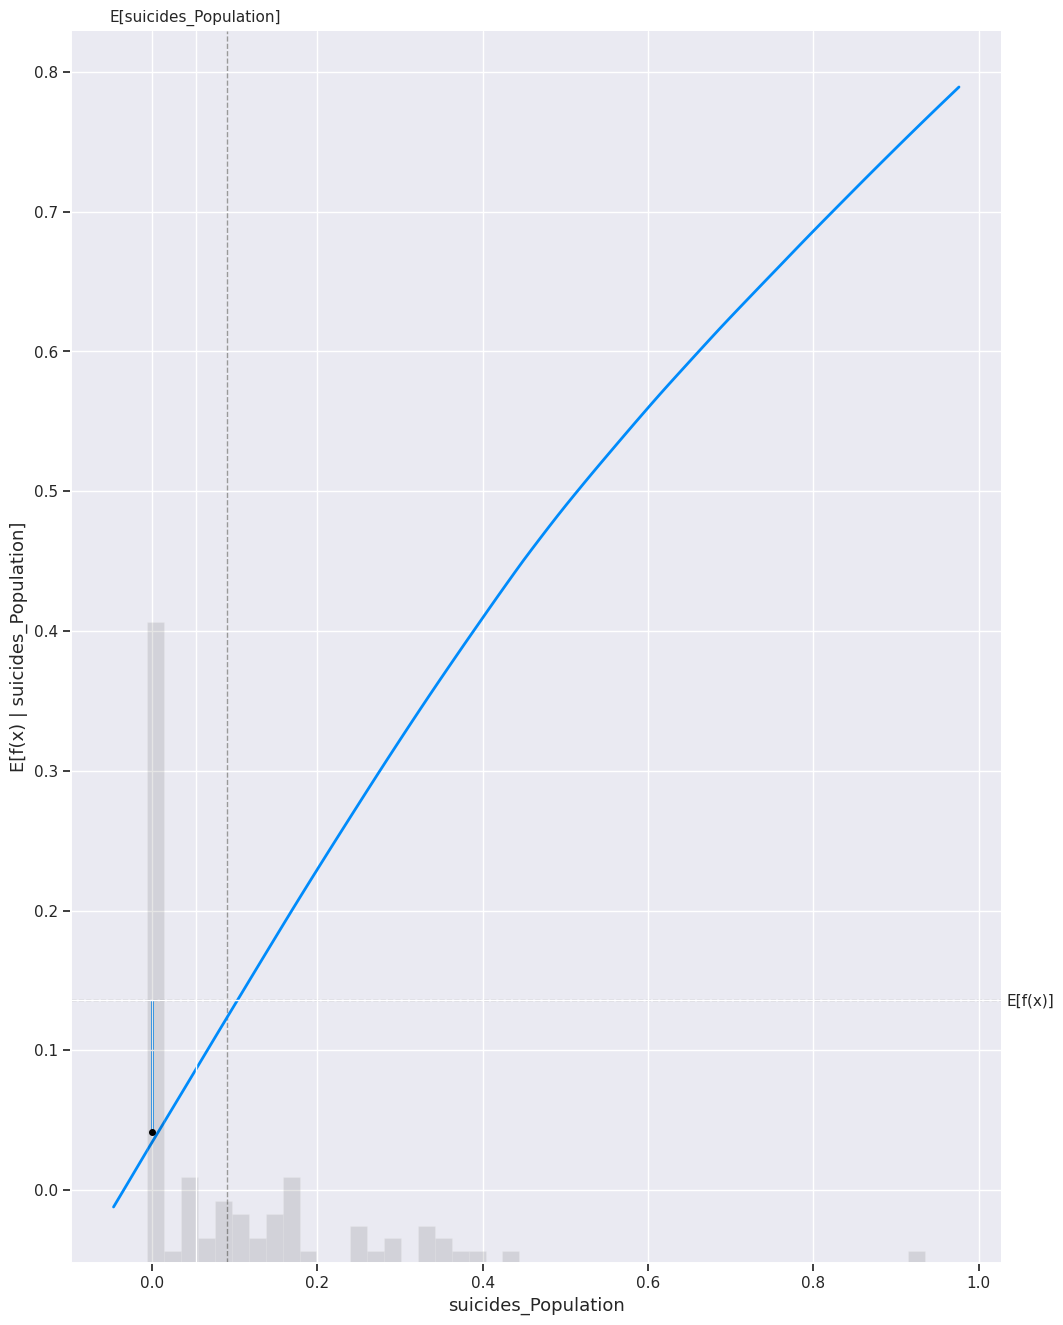

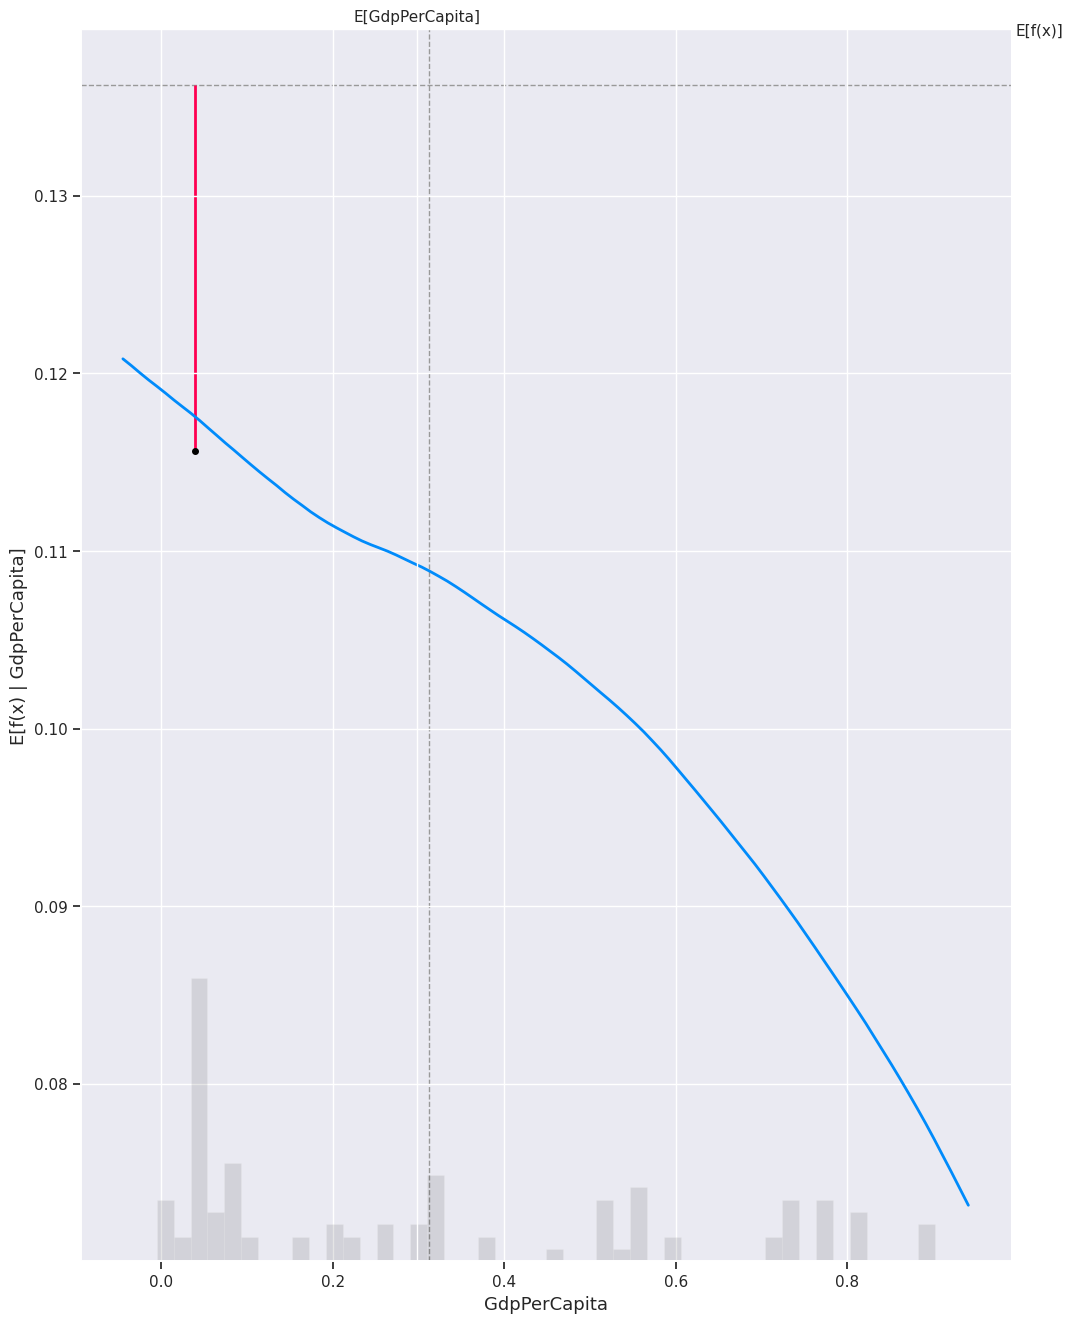

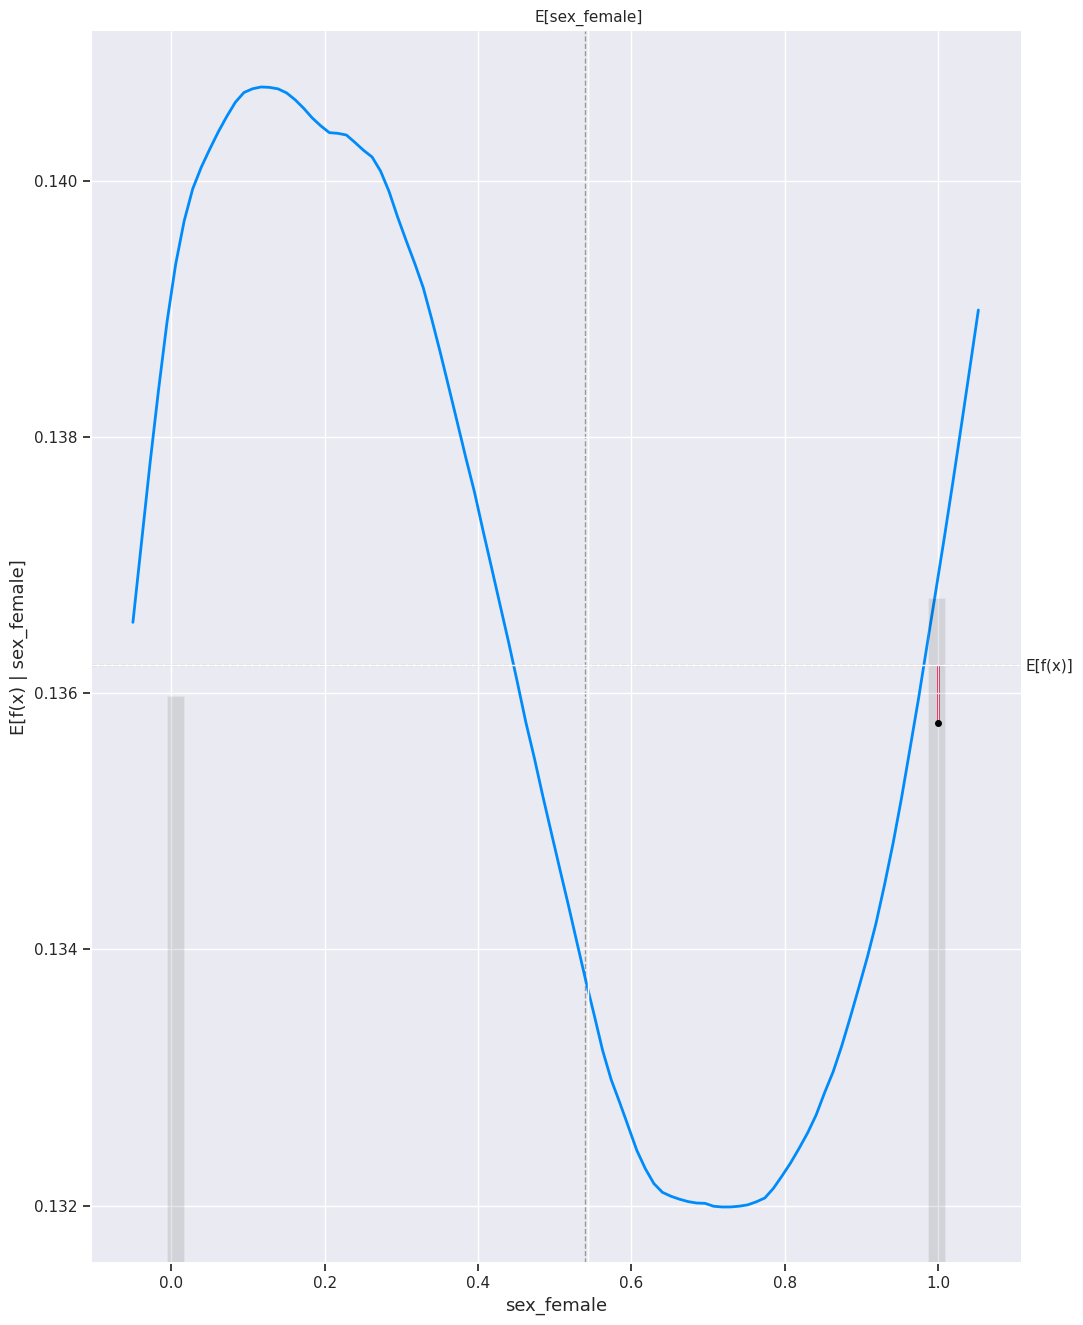

In [60]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        regr.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=MLP_shap_values[sample_ind : sample_ind + 1, :],
    )


##Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plot is

SHAP feature importance plot for MLP model
Using the below plot we can come on the conclusion that the suicide_population is the most important feature, followed by population and sex_female.

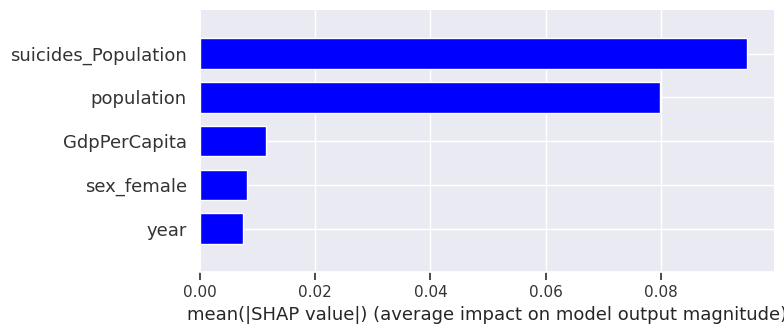

In [61]:
# SHAP variable importance for a Linear Model
shap.summary_plot(MLP_shap_values, x_train, plot_type="bar", color="blue")

In [62]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(MLP_shap_values[index], max_display=14)

##Interpreting Waterfall SHAP visualization

Interpreting Waterfall SHAP visualization
Let's consider the same sample (sample_ind = 18).
It says that f(x) = 0.003 is what we got as a model output and the expected output for this sample was 0.13. We came pretty close to determining it as the difference is very less. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that suicide_population has the biggest and most negative impact in increasing the number of suicides by 0.08 for this specific sample. Followed by GdpPerCapita had a negative impact and it bought the number of suicides down again by 0.1 for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 0.093

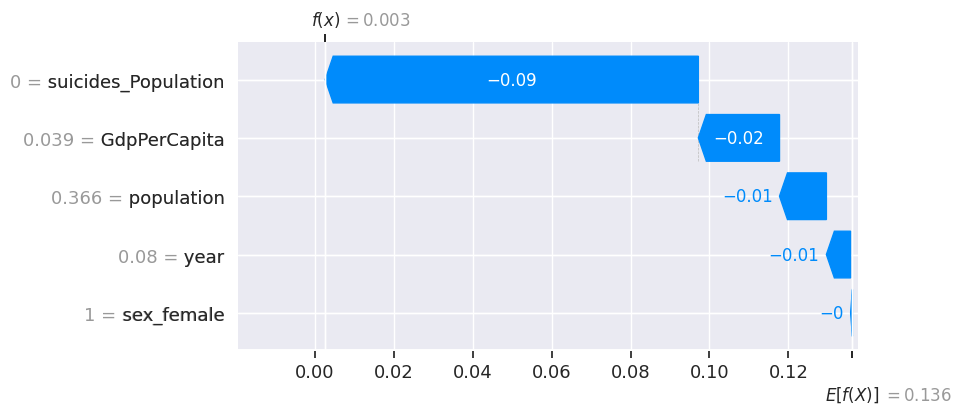

In [63]:
get_SHAP()


##Interpret the summary plot MLP Model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

1. Each dot(both red and blue) represents a feature of a suicides
Red color represents high values whereas blue color represents low value
2. If a dot(a feature of suicides) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
3. The position of a dot(a feature of suicides) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how the features are affecting the model.

* Higher value of suicides_population tends to have a positive impact on the number of suicides
* Lower values of sex_female tend to have a positive impact on the number of the suicides.
* Higher values of GdpPerCapita tends to have a positive impact on the number of suicides
* Lower value of total_sulphur_dioxide tends to have a positive impact on the number of suicides, and so on.
We could also interpret the intensity of impact



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


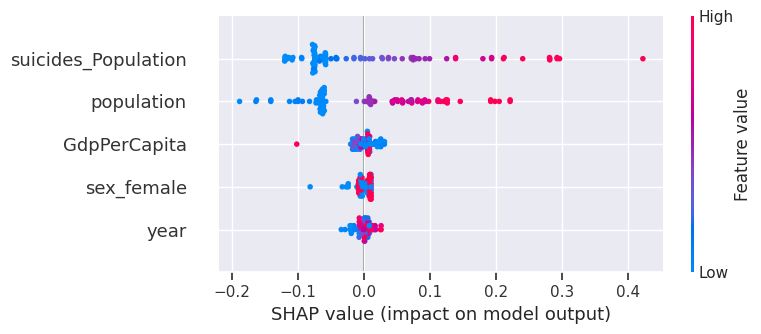

In [64]:
# SHAP summary for Linear Model
shap.summary_plot(MLP_shap_values, x_train_100)

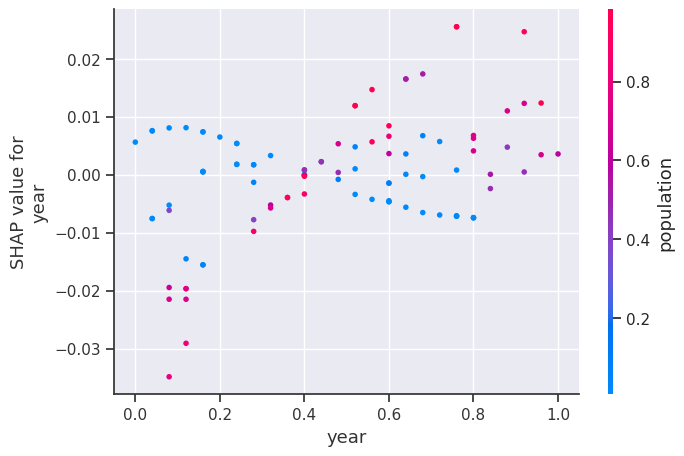

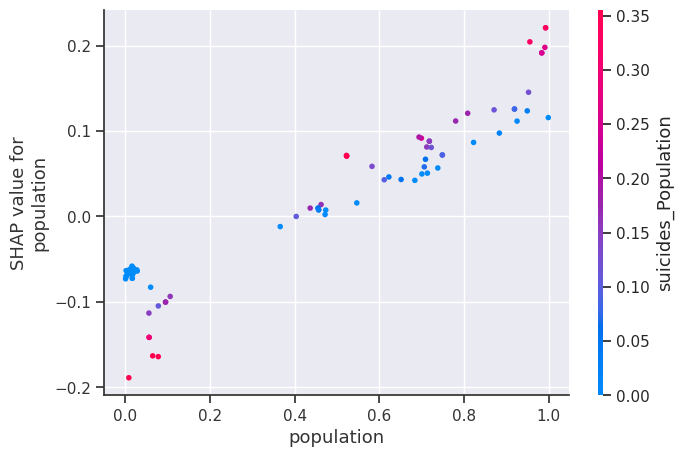

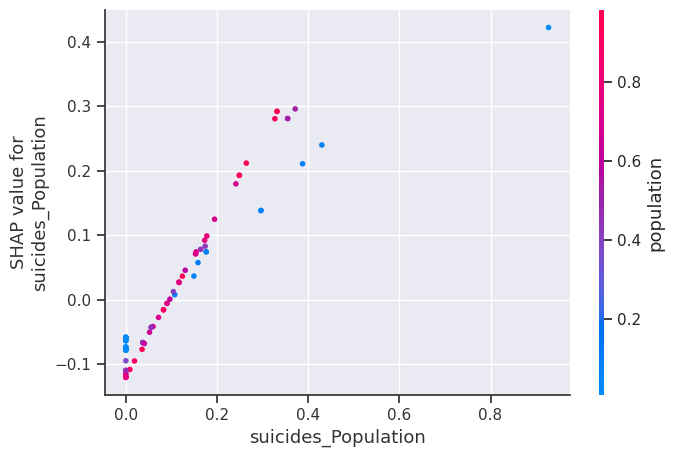

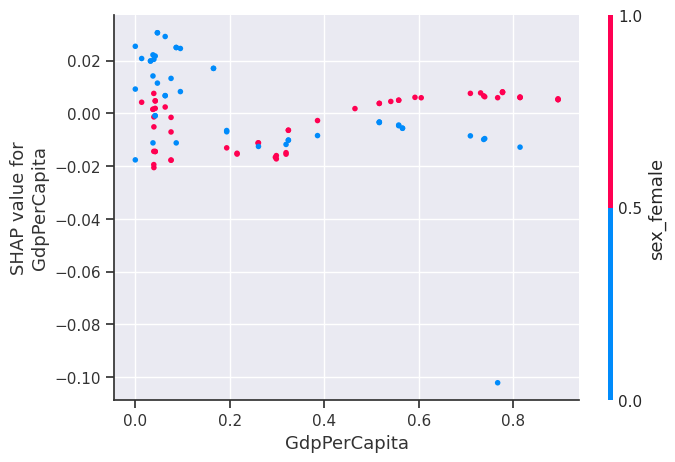

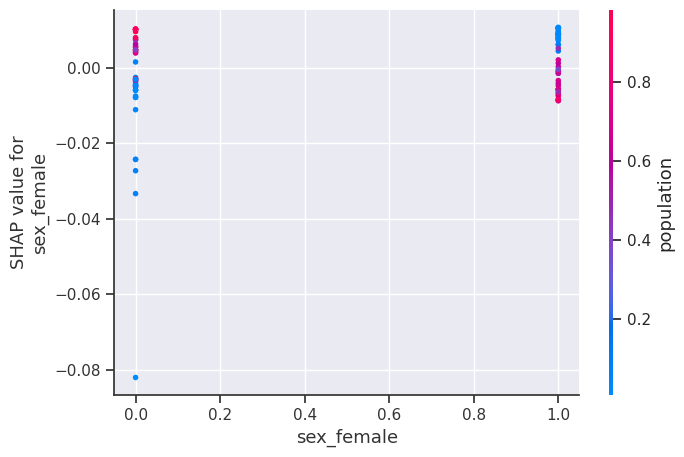

In [65]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, MLP_shap_values.values, x_train_100)

##Heatmap Visualization for Linear and Tree-based model
This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is


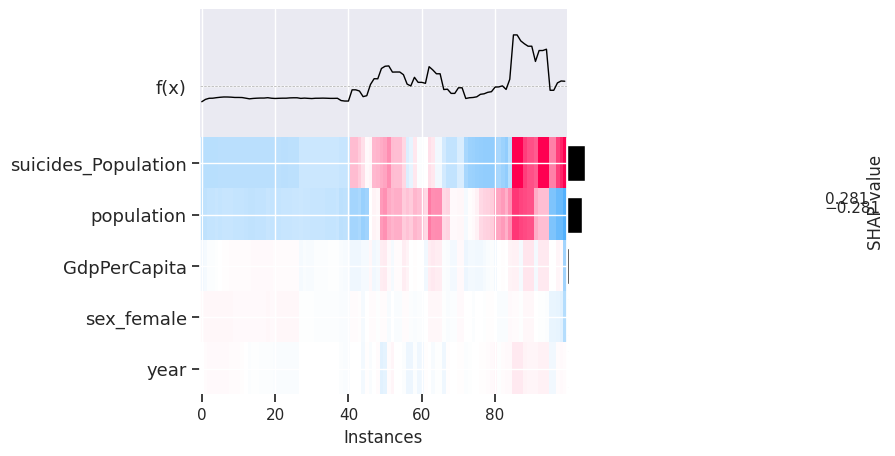

In [66]:
shap.plots.heatmap(MLP_shap_values)  # SHAP HeatMap of a Tree Based Model


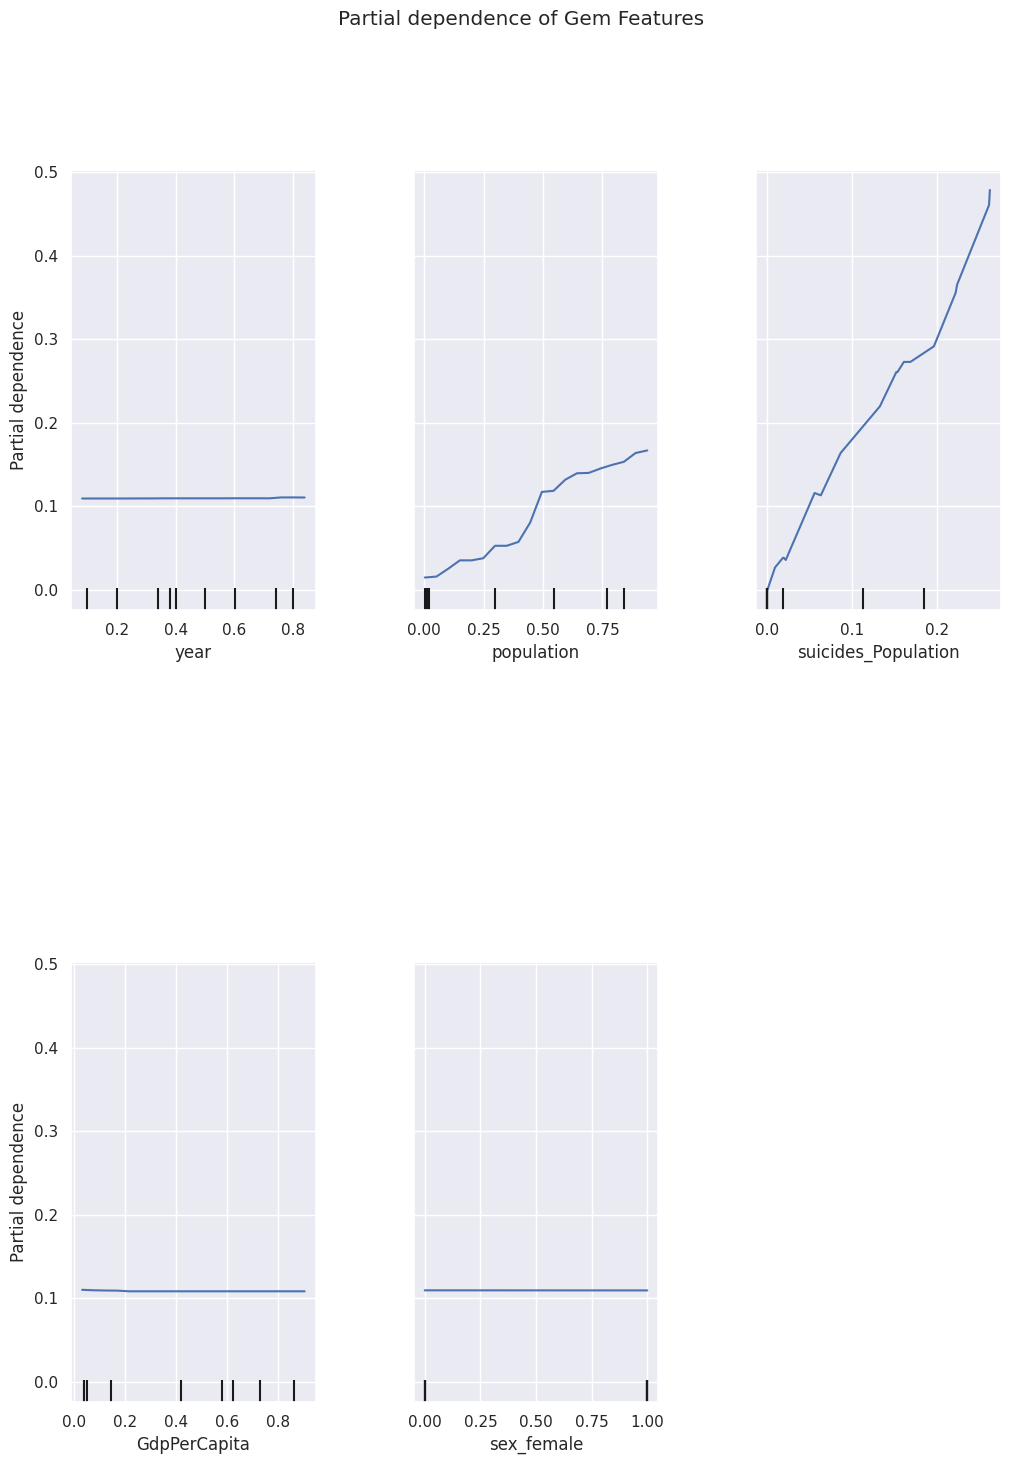

In [67]:
# PDP Plot for tree model Model
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(tree_model, x_test, x_test.columns,n_jobs=3, grid_resolution=20 )
fig = plt.gcf()
fig.suptitle("Partial dependence of Gem Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)


##Interpreting AutoML's best model with tuned hyperparameters
###How are errors/residuals distributed and how interpretable is your model ?
**Residual Analysis**

* Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.

**Variable Importance**

* In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

**SHAP Summary**

From the SHAP summary diagram, we can interpret a few conclusions -

1. All the features are listed as per their importance in making the prediction, that is suicide_population is more significant followed by population, and so on.
2. The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see suicide_population has the most impact on the number of the suicide. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of suicide_population results in high number of suicide. As we can see the distribution of red points in the suicide_population feature is far more spread than the blue points. From this visual, we can interpret that the number of suicide vastly increases as the amount of suicide_population increases. It doesn't have much impact if the content is low. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the number of the suicide.

The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

**Partial Dependence Plot (PDP)**

A partial dependence plot shows the marginal effect of a feature on the target. It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - suicide_population and population.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in suicide_population, we can see the mean response increases between suicide_population levels of 0.0 and 10. This could be interpreted as this range of suicide_population could be the deciding factor in the number of the suicide. 
2. Similarly when the rest of the variables are kept constant and a marginal change is made in population we can observe the mean response of number going up between the population range of 0.0 to 400000. Hence, it can be interpreted that this range is deciding factor in the number of the suicide.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

**ICE (Individual Conditional Expectation) Plot**
ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the suicide_population and population features, as we interpreted in PDP the number of suicide increases when suicide_population and population value is between 0 to 10 and 0 to 400000 respectively. But is this true for every suicide in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the number of a few suicide(0th percentile instance) increases a lot in this range while the number of a few doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.



# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

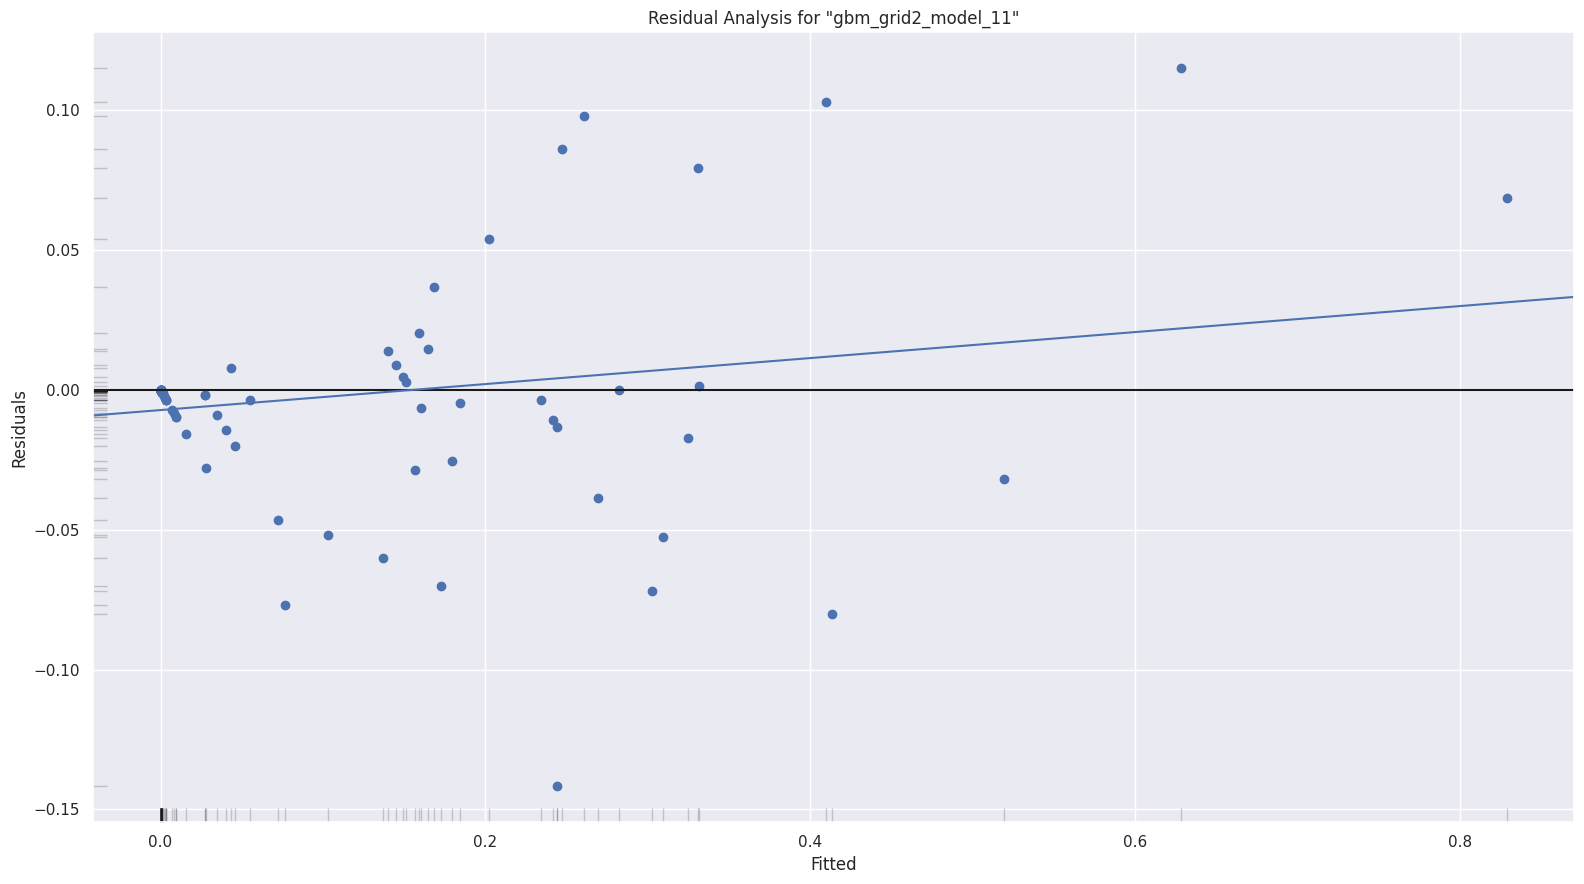

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

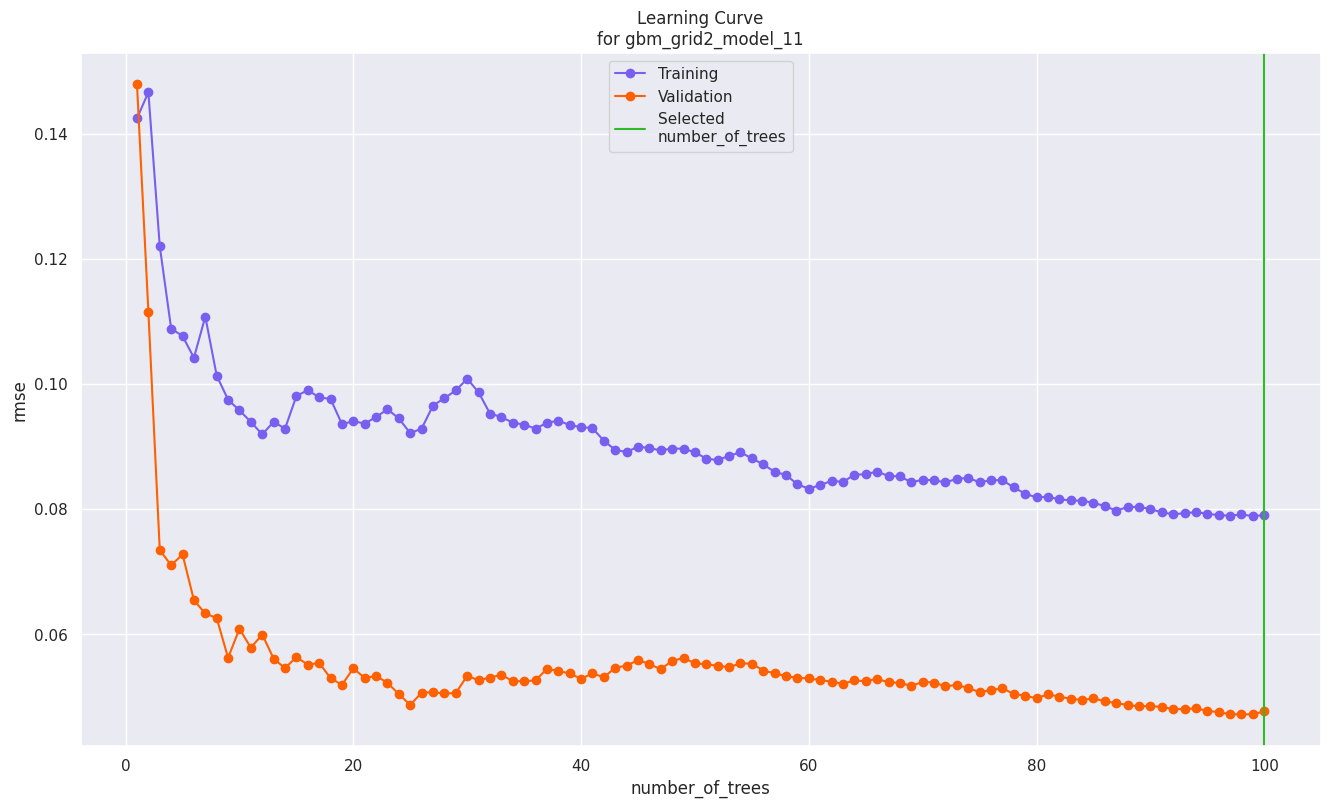

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

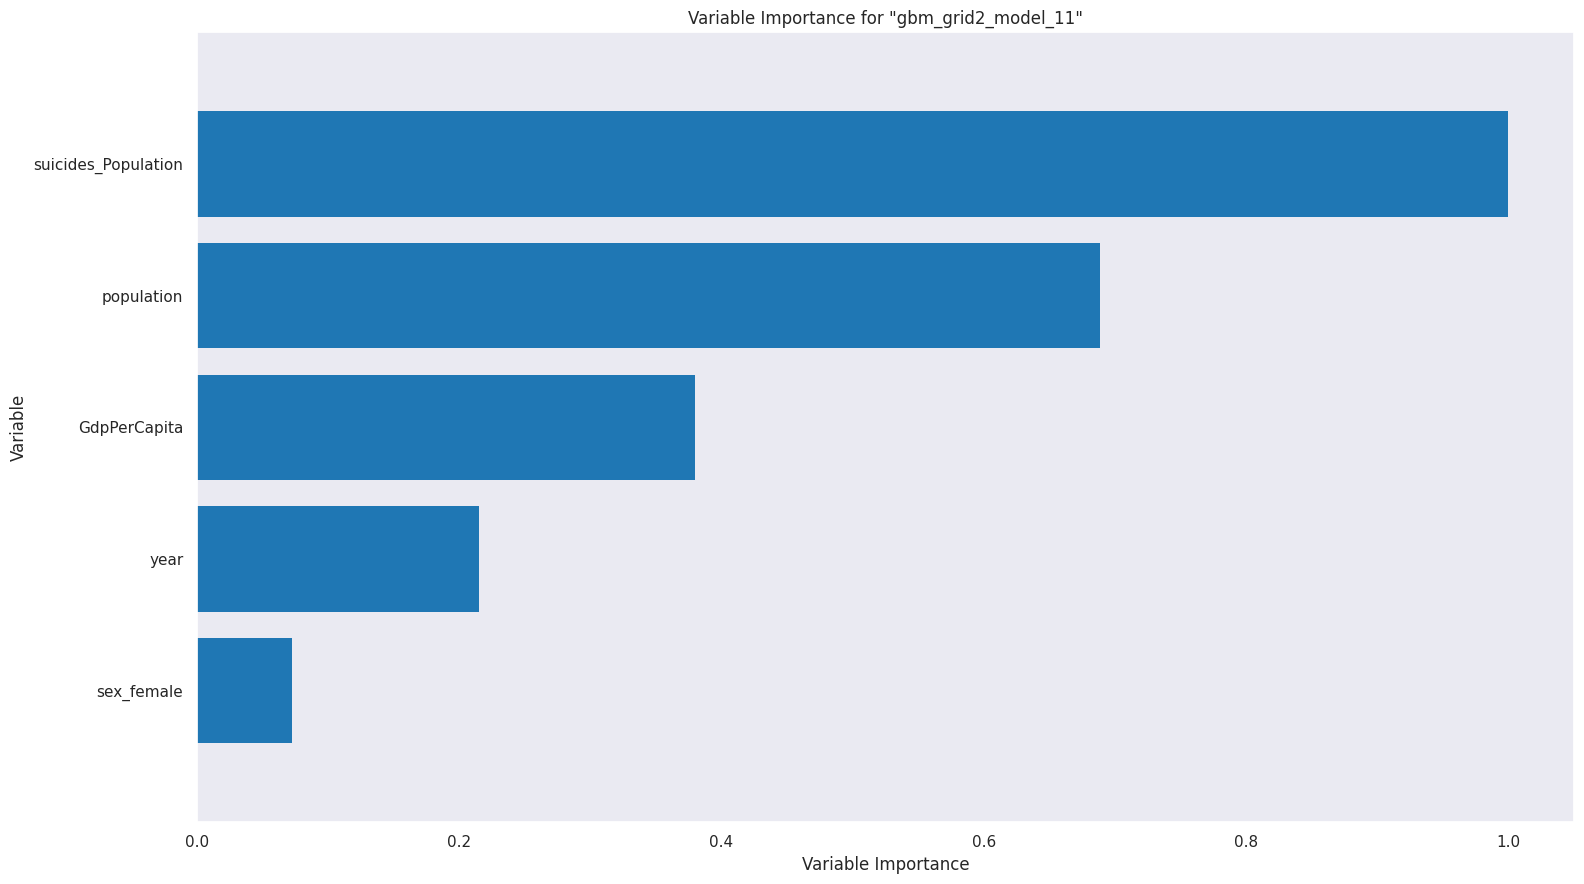

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

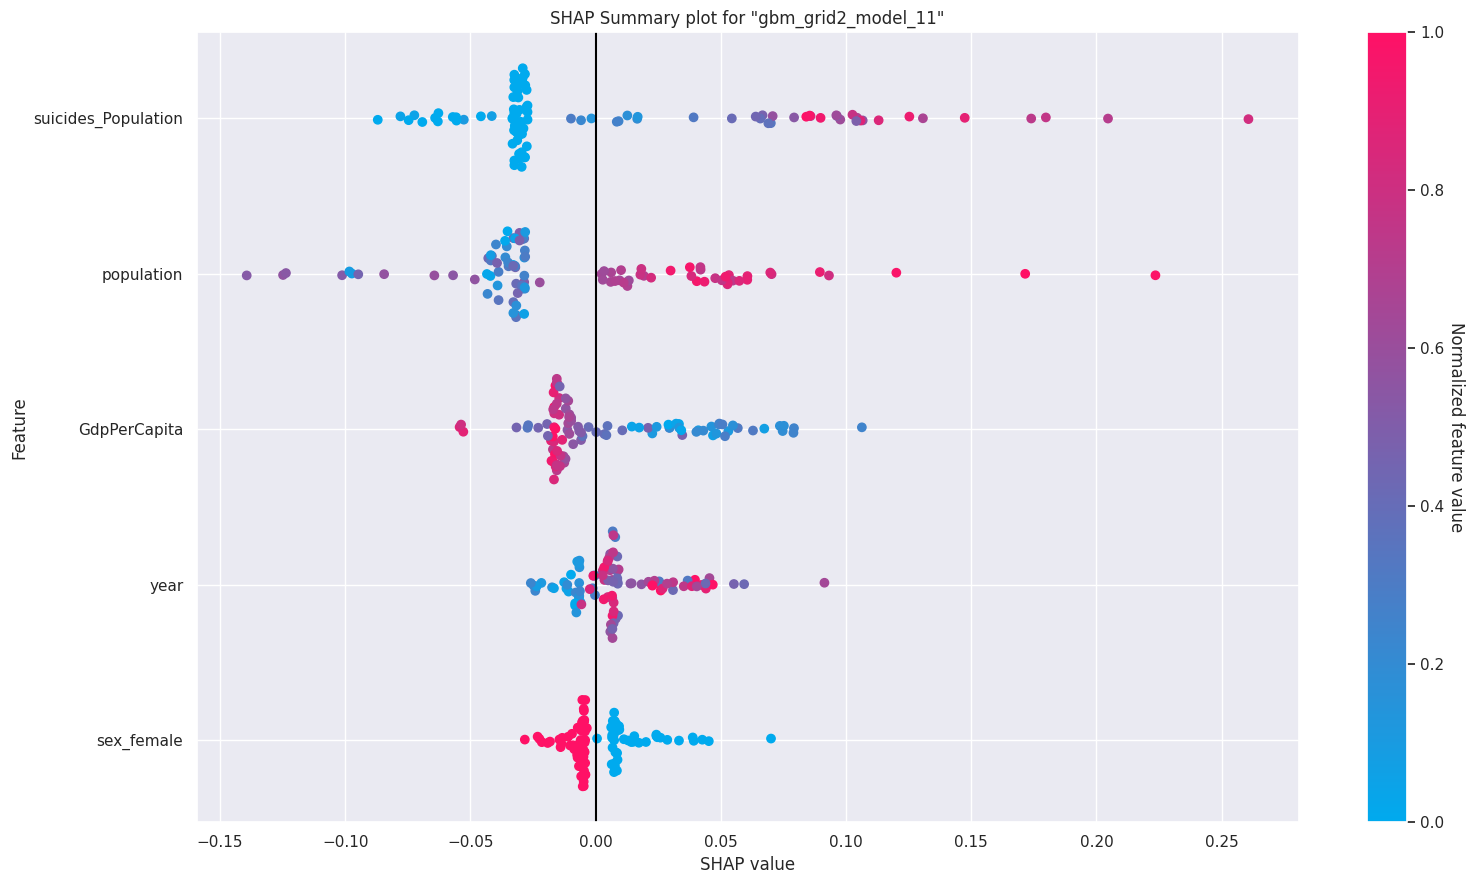

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

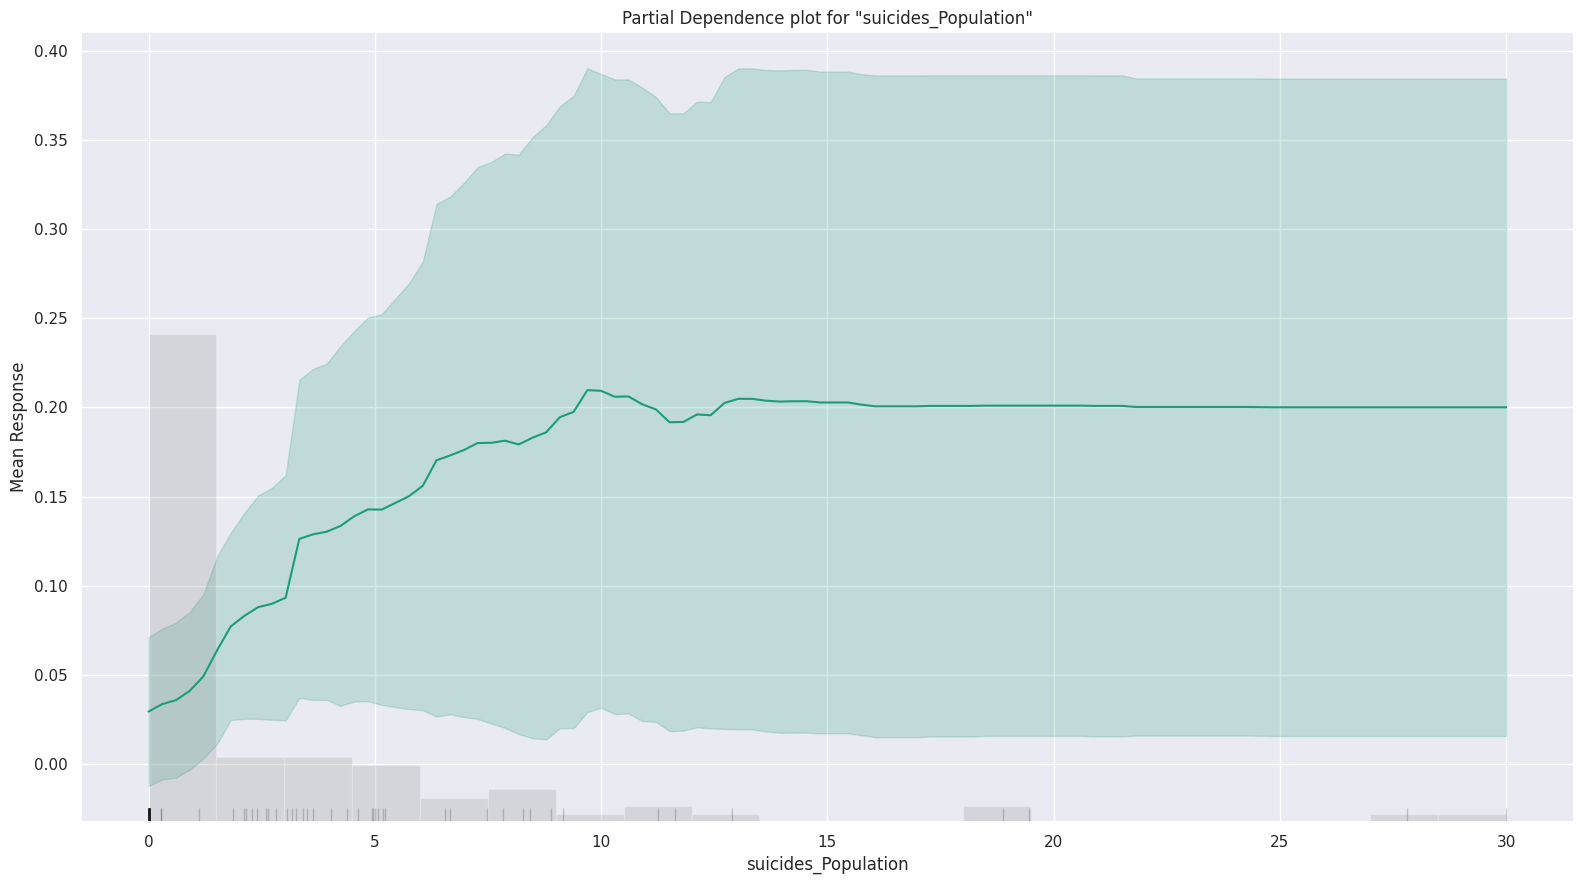

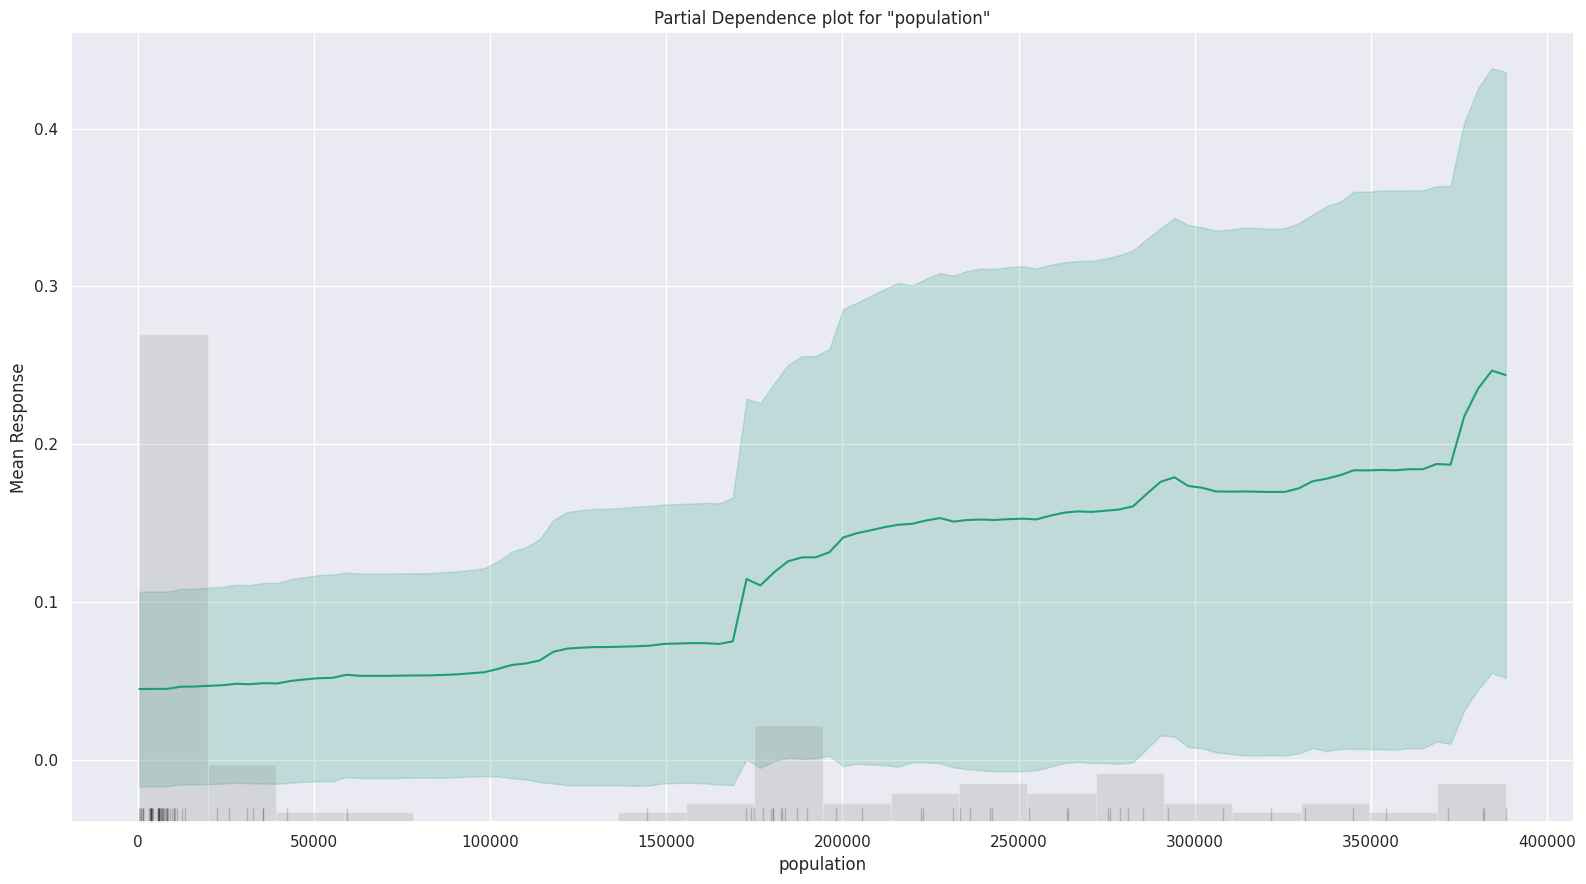

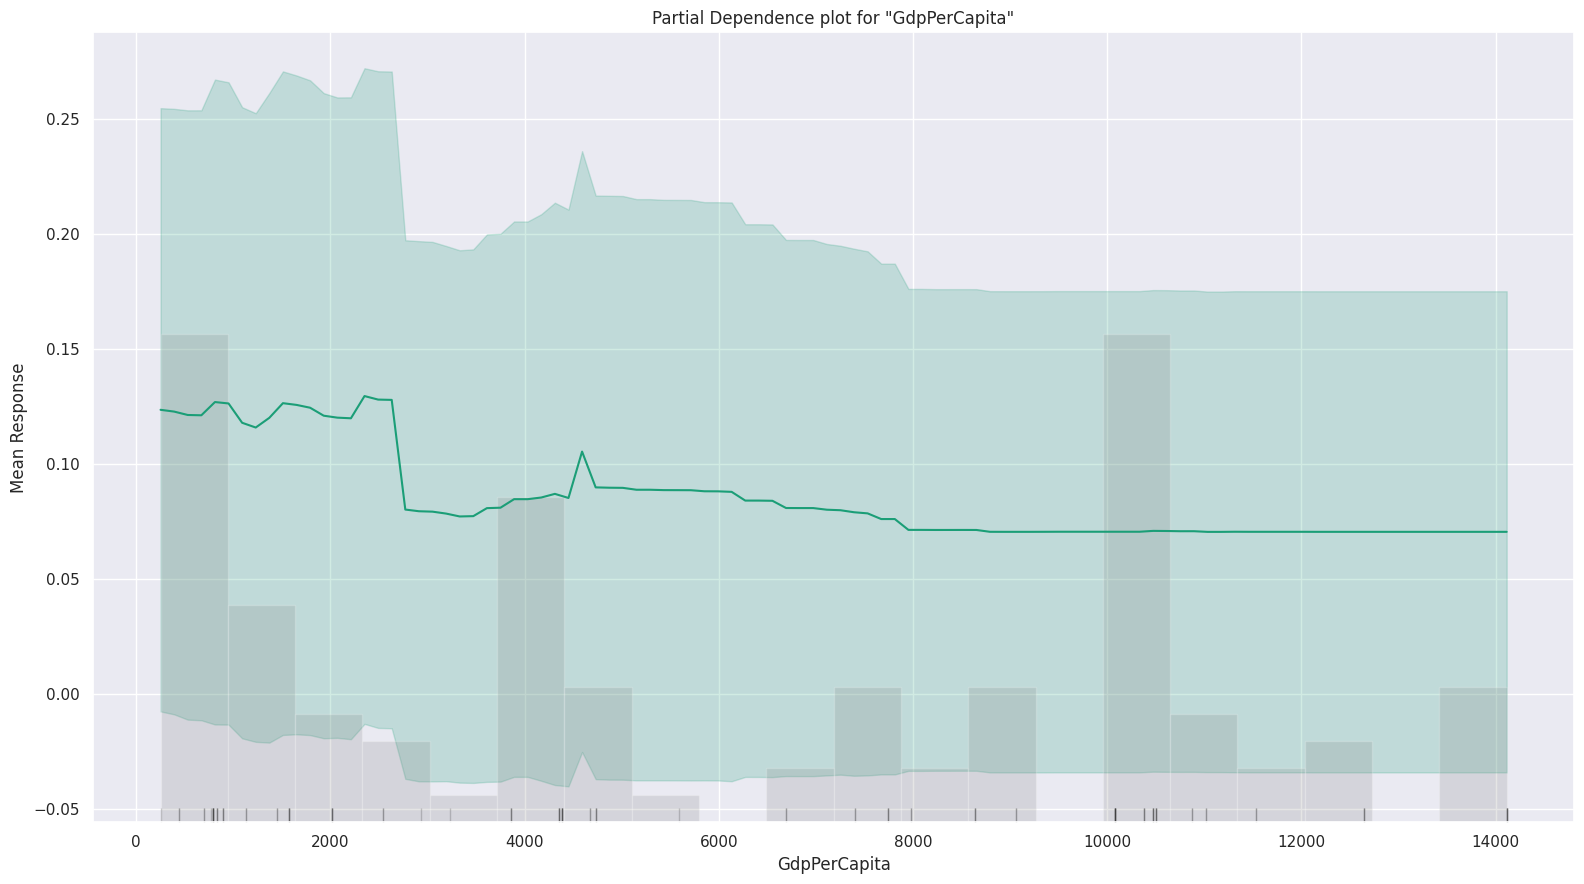

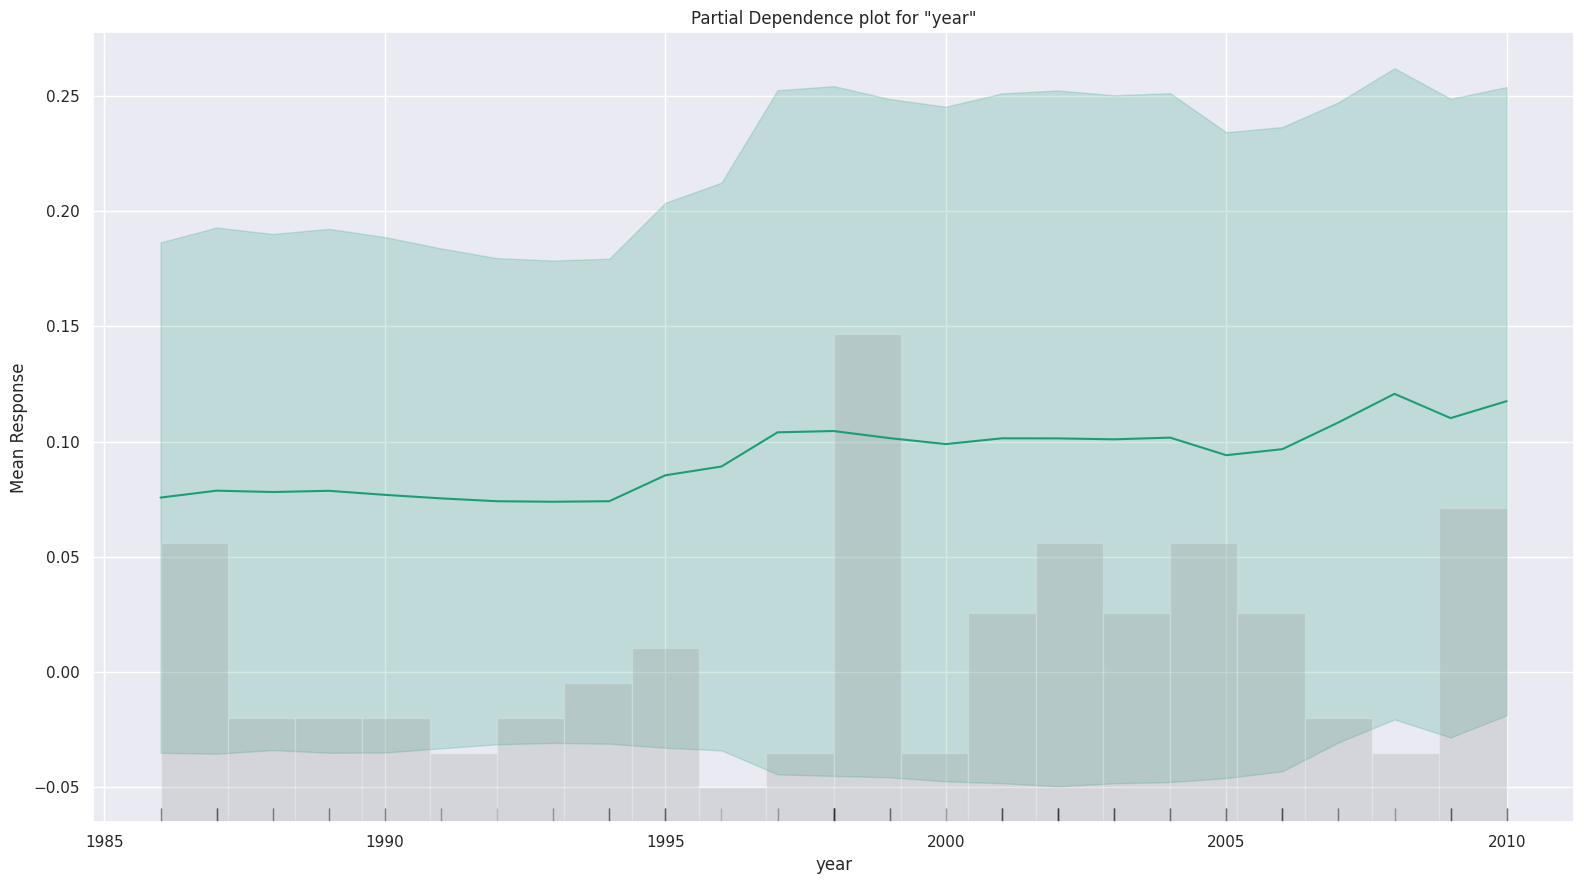

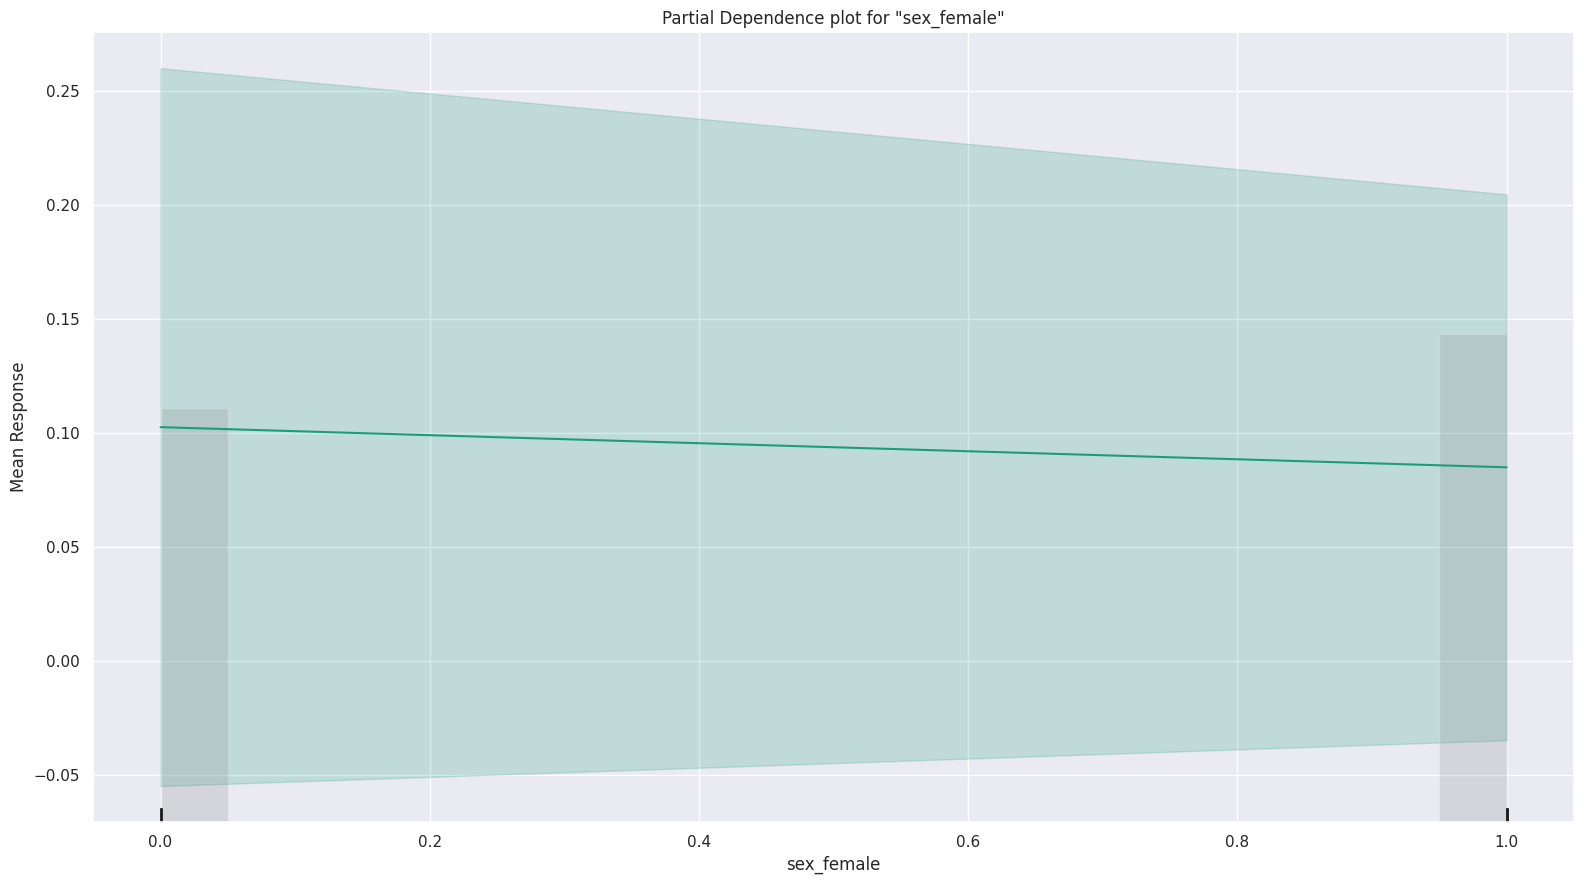

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

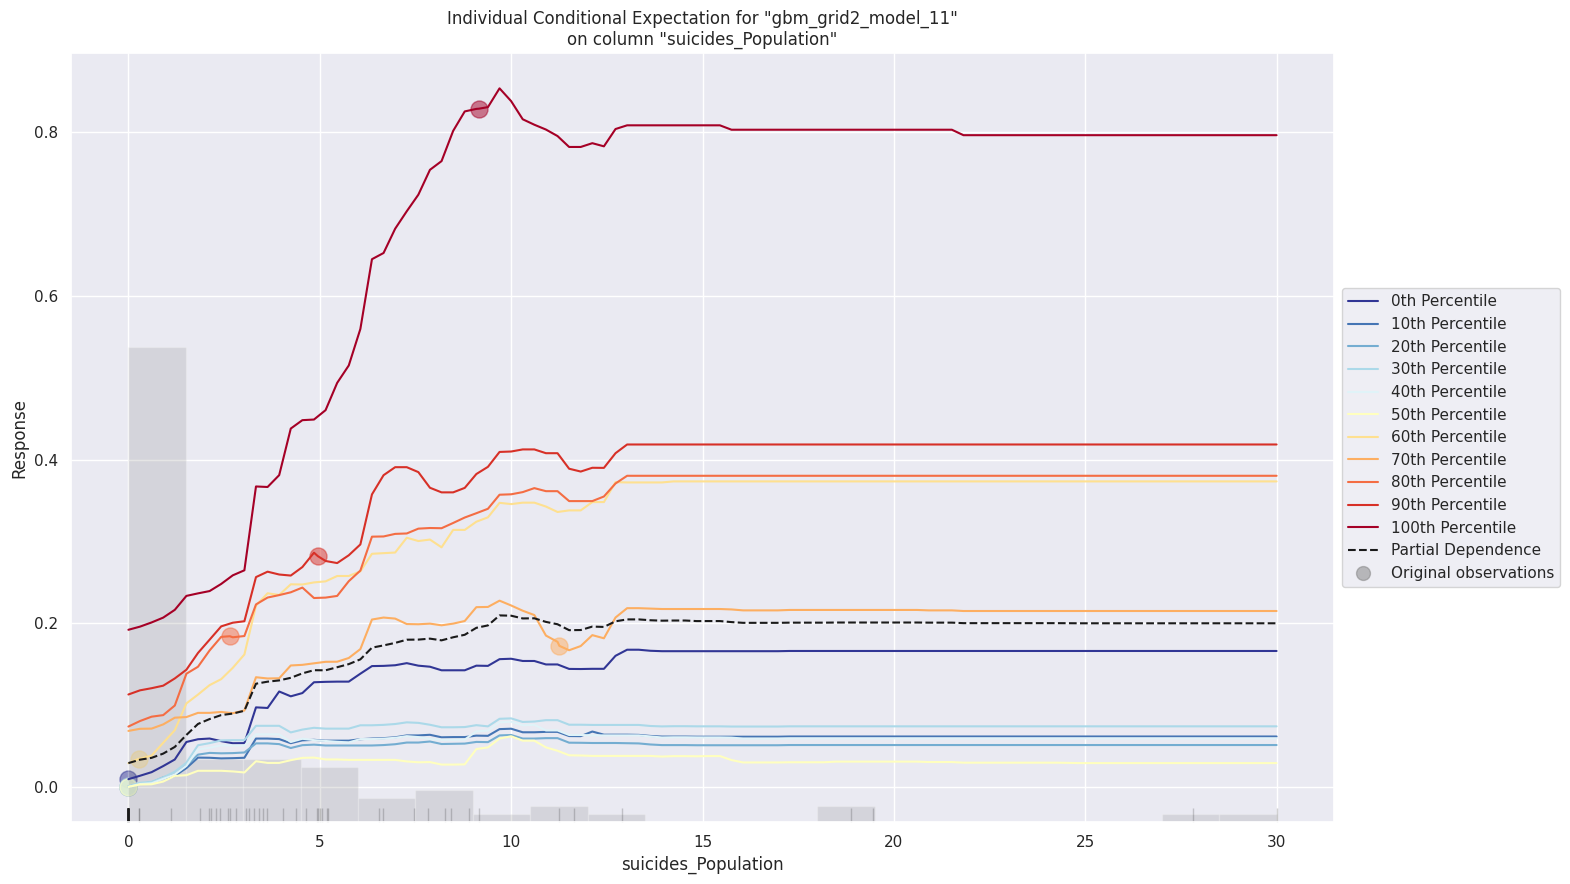

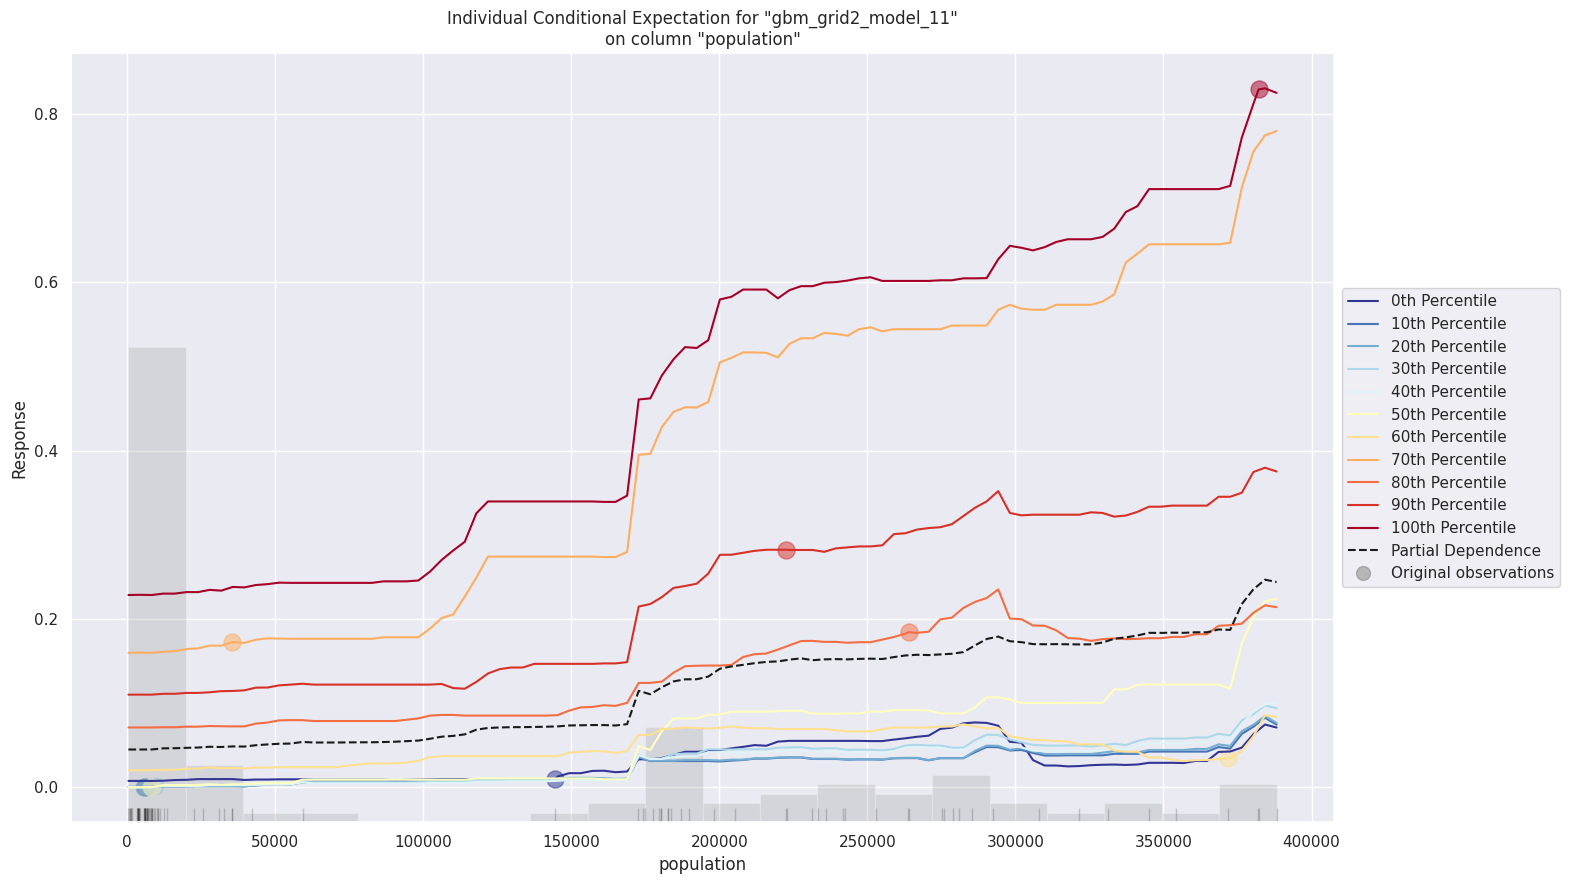

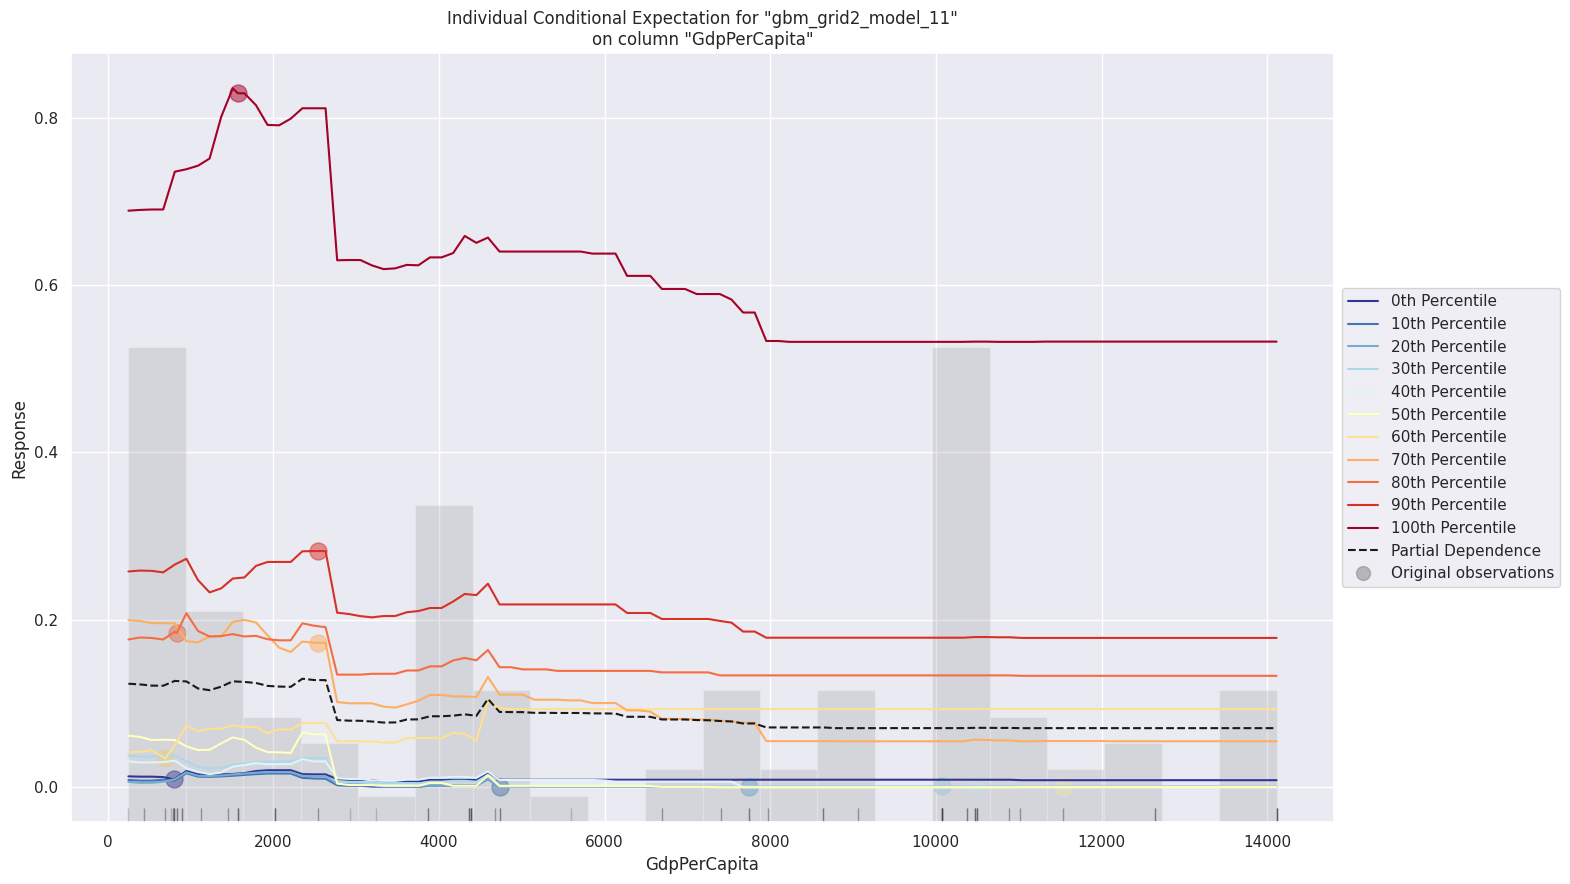

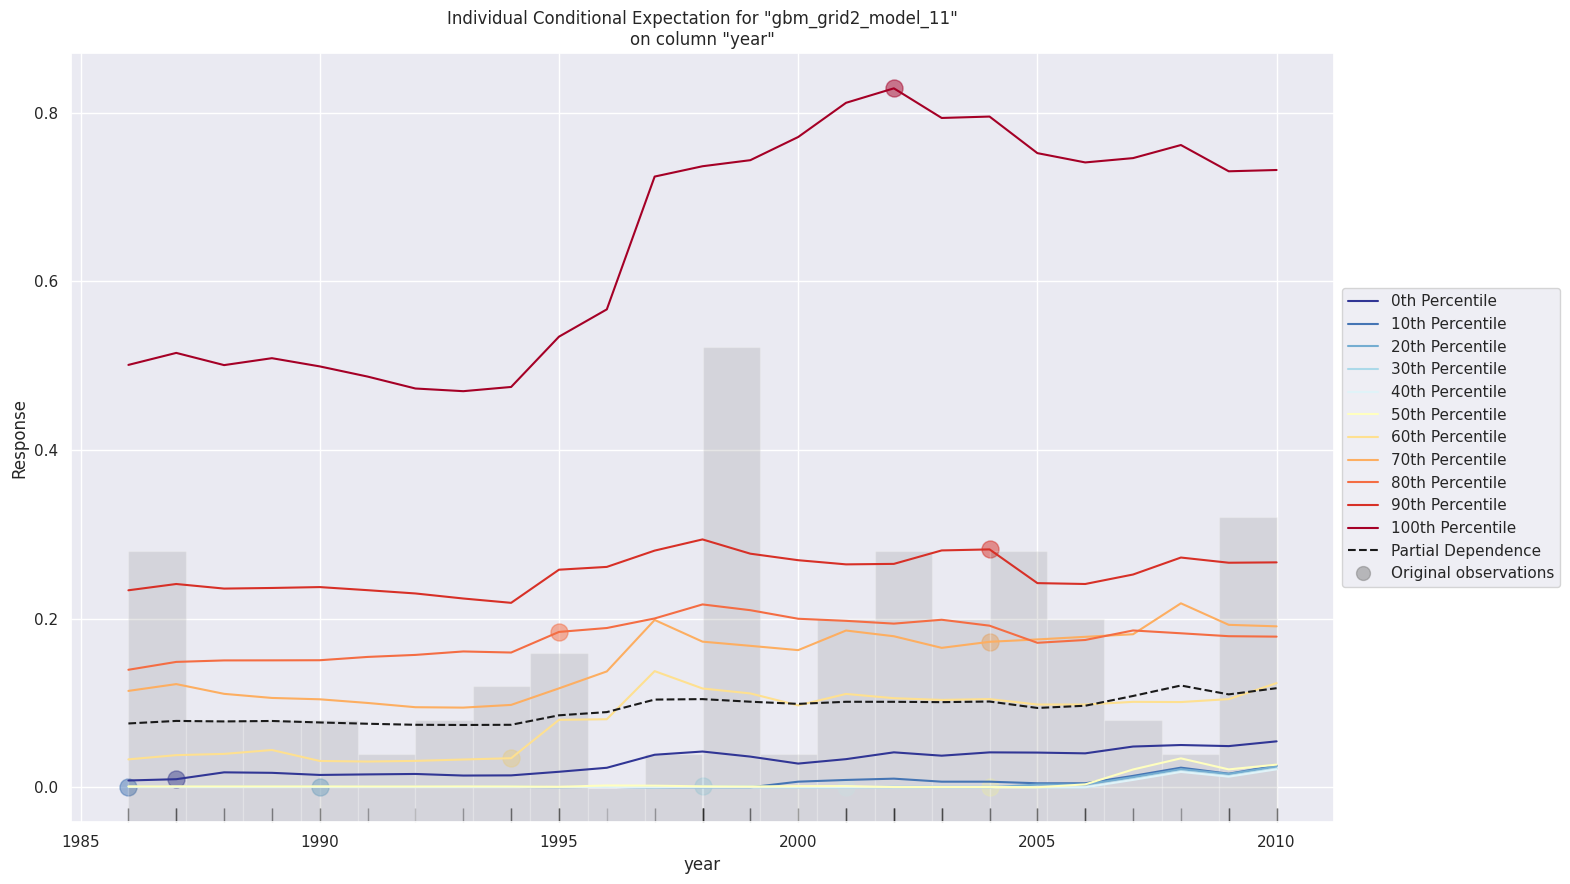

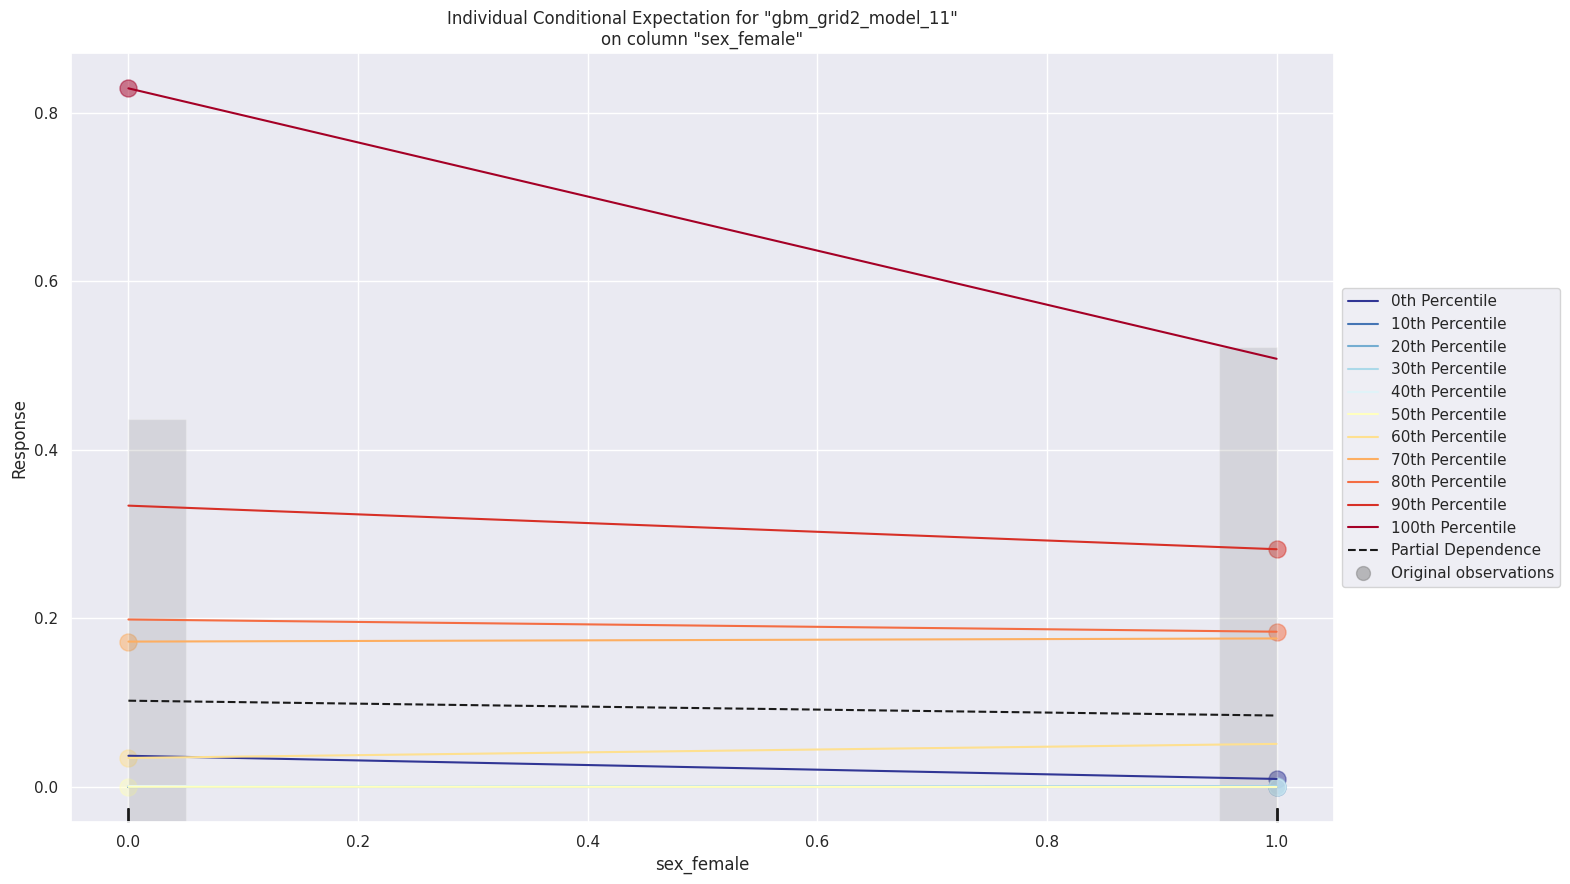

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [68]:
best_xgboost_model.explain(autoML[1])  # AutoML Explainability


##Learning Outcomes
* I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning

* Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc

* Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested

* Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks

* Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.

##References
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d